<center> <h1>ANÁLISIS EXPLORATORIO DE LOS DATOS</h1> </center>
<center> <h4>ESTEATOHEPPATITS NO ALCOHÓLICA</h4> </center>

### Roberto Holgado Cuadrado
###### Ingeniería Biomédica -TFG

###### Indice

* **1. Visualización de datos y estadísticos descriptivos**
* **2. Tratamiento con variables categóricas.**
* **3. Identificación valores anómalos erróneos.**
    * 3.1 Método experto clínico
    * 3.2 Método Teorema Central del límite
* **4. Tratamiento valores perdidos**
* **5. Distribucción de las variables. Histogramas.**
* **6. Transformación logarítmica.**
* **7. Estudio correlacional**
    * 7.1 Mapas de calor(heat maps)
    * 7.2 Boxplots

### 1. Visualización de datos y estadísticos descriptivos

In [35]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss
import statistics as stats
import seaborn as sns 
from pandas.plotting import autocorrelation_plot

In [36]:
patient_data = pd.read_csv('pacientes_na.csv')
patient_data= patient_data.drop(['Unnamed: 0','historia'], axis=1) 
columns=list(patient_data.columns)
variables=patient_data.drop(['enfermedad'], axis=1)
column_name=list(variables.columns)

patient_data_original=patient_data.copy()

In [37]:
# Dimensiones de la base de datos
print(patient_data.shape)
#Numero de valores unicos por variable 
#print(patient_data.nunique())

(2828, 41)


Se pueden calcular distintos estadísticos descriptivos que resumen la tendencia, la dispersión y la distribución de nuestro conjunto de datos. 

In [38]:
#round(patient_data.describe(include='all'),2)
#%notebook
pd.set_option('display.max_columns',50)
round(patient_data.describe(),2)

,edad,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,enfermedad
count,2828.00,2828.00,2828.00,2828.00,2828.00,1900.00,2072.00,2768.00,2707.00,2766.00,2619.00,2788.00,2680.00,2709.00,2787.00,2671.00,2725.00,2713.00,2694.00,2757.00,2777.00,2120.00,2156.00,2280.00,2791.00,1449.00,2777.00,2776.00,2785.00,2079.00,2591.00,2796.00,2624.00,2828.00,2790.0,2796.00,2623.00,2692.00,2828.00,2828.00
mean,55.66,78.78,160.20,146.12,83.96,21.10,16.03,4.27,1.12,10.53,165.65,211.99,129.50,62.48,171.71,86.51,66.84,205.70,288.22,55.50,15.41,5.08,19.09,6.58,120.78,260.46,282.69,8.67,6.59,409.45,65.22,0.84,0.82,11.53,inf,91.28,99.51,17.29,0.30,0.23
std,15.08,19.06,23.09,20.74,11.51,11.30,7.32,0.85,5.84,18.29,133.09,41.48,36.26,17.92,106.67,50.86,27.95,168.12,47.43,82.79,8.75,5.92,24.70,5.65,44.52,103.19,82.78,22.72,2.34,167.28,139.69,0.25,0.29,21.79,NaN,20.10,25.25,13.12,0.46,0.42
min,0.00,0.00,0.00,81.00,41.00,0.89,-4.50,0.00,0.20,8.10,3.97,71.00,15.00,20.00,26.00,14.00,-15.00,1.12,22.00,5.00,3.60,0.16,0.20,2.80,0.62,3.69,2.48,4.40,2.10,1.04,0.00,0.30,-0.05,3.00,0.0,16.69,5.01,-3.30,0.00,0.00
25%,47.00,68.00,155.00,133.00,76.00,14.80,11.00,4.10,0.50,9.60,85.00,186.00,106.00,50.00,103.00,64.00,48.00,93.00,257.00,21.00,14.10,2.43,9.90,5.60,96.00,173.00,229.00,7.20,5.30,294.10,5.16,0.70,0.66,3.30,26.6,80.13,85.28,11.50,0.00,0.00
50%,57.00,78.00,162.00,144.00,83.00,19.00,14.90,4.30,0.70,9.90,124.00,211.00,128.00,60.00,144.00,78.00,63.00,157.00,283.00,32.00,15.10,3.74,14.60,5.90,107.00,249.00,273.00,7.50,6.50,377.40,14.00,0.80,0.76,4.78,29.4,94.40,104.24,15.70,0.00,0.00
75%,66.00,89.00,170.00,157.00,91.00,26.00,19.60,4.50,0.90,10.20,194.00,235.00,150.00,72.00,206.00,96.00,81.00,265.00,315.00,56.00,16.10,5.90,21.60,6.60,127.00,327.00,322.00,7.80,7.60,493.00,46.60,0.90,0.91,11.00,32.9,104.06,115.81,21.30,1.00,0.00
max,96.00,175.00,195.00,473.00,138.00,285.00,45.40,44.00,225.00,938.00,980.00,769.00,696.00,211.00,912.00,946.00,300.00,999.00,586.00,996.00,411.80,128.00,613.00,156.00,513.00,813.00,981.00,714.00,57.00,999.90,981.25,3.60,8.10,387.00,inf,160.34,352.18,545.40,1.00,1.00


In [39]:
#patient_data.isnull().sum()
#foo = patient_data.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8,layout = (10,4)) #detectar posibles outliers

### 2. Tratamiento variables categóricas

La estrategia de transformación de variables categóricas se basa en la codificación a entero.

In [40]:
#convert sex to categorical variable
patient_data['sexo'] = patient_data['sexo'].astype('category').cat.as_ordered()
patient_data.sexo.cat.categories
#patient_data.info()
patient_data['sexo'] = patient_data.sexo.cat.codes

In [41]:
#round(patient_data.describe(),2)

### 3. Identificación valores anómalos erróneos

Para identificar los **outliers**  se debe conocer el rango dinámico normal de cada variable. Para ello, es necesaria la ayuda de un experto clínico que conozca y defina los posibles valores para cada variable. Una vez conocido, sabremos que los valores fuera de este rango, serán errores que se deberán tratar. Lo primero que se hará será convertir los outliers en valores perdidos.

#### 3.1 Método rango definido por experto clínico

In [42]:
#EDAD 
for i in patient_data['edad']:
    if i < 14  or  i > 96:
        patient_data['edad']= patient_data['edad'].replace({i: np.nan})
        
#PESO
for i in patient_data['peso']:
    if i < 50  or  i > 120:
        patient_data['peso']= patient_data['peso'].replace({i: np.nan})
        
#TALLA
for i in patient_data['talla']:
    if i < 130:
        patient_data['talla']= patient_data['talla'].replace({i: np.nan})
        
#TAS
for i in patient_data['TAS']:
    if i > 230:
        patient_data['TAS']= patient_data['TAS'].replace({i: np.nan})

#Albúmina
for i in patient_data['albumina']:
    if i < 2  or  i > 6:
        patient_data['albumina']= patient_data['albumina'].replace({i: np.nan})
        
#Bilirrubina
for i in patient_data['bilirrubina']:
    if i < 0.2  or  i > 1.5:
        patient_data['bilirrubina']= patient_data['bilirrubina'].replace({i: np.nan})
        
#Calcio
for i in patient_data['calcio']:
    if i < 8  or  i > 13:
        patient_data['calcio']= patient_data['calcio'].replace({i: np.nan})
        
#CPK
for i in patient_data['cpk']:
    if i < 10  or  i > 300:
        patient_data['cpk']= patient_data['cpk'].replace({i: np.nan})

#colesterol
for i in patient_data['colesterol']:
    if i < 70  or  i > 300:
        patient_data['colesterol']= patient_data['colesterol'].replace({i: np.nan})
        
#LDL
for i in patient_data['LDL']:
    if i < 35  or  i > 200:
        patient_data['LDL']= patient_data['LDL'].replace({i: np.nan})
        
#HDL
for i in patient_data['HDL']:
    if i < 15  or  i > 100:
        patient_data['HDL']= patient_data['HDL'].replace({i: np.nan})
        
#trigl
for i in patient_data['trigl']:
    if i < 20  or  i > 300:
        patient_data['trigl']= patient_data['trigl'].replace({i: np.nan})

#fosfatasa
for i in patient_data['fosfatasa']:
    if i < 14  or  i > 120:
        patient_data['fosfatasa']= patient_data['fosfatasa'].replace({i: np.nan})

#hierro 
for i in patient_data['hierro']:
    if i < 5  or  i > 100:
        patient_data['hierro']= patient_data['hierro'].replace({i: np.nan})
    
#ferritina 
for i in patient_data['ferritina']:
    if i < 5  or  i > 400:
        patient_data['ferritina']= patient_data['ferritina'].replace({i: np.nan})
        
#transferrina 
for i in patient_data['transferrina']:
    if i < 22  or  i > 320:
        patient_data['transferrina']= patient_data['transferrina'].replace({i: np.nan})
        
#GGT 
for i in patient_data['GGT']:
    if i < 5  or  i > 100:
        patient_data['GGT']= patient_data['GGT'].replace({i: np.nan})
        
#hemoglob 
for i in patient_data['hemoglob']:
    if i < 8  or  i > 17:
        patient_data['hemoglob']= patient_data['hemoglob'].replace({i: np.nan})
        
#homa 
for i in patient_data['homa']:
    if i < 0.2  or  i > 7.5:
        patient_data['homa']= patient_data['homa'].replace({i: np.nan})
        
#insulina 
for i in patient_data['insulina']:
    if i < 0.2  or  i > 22:
        patient_data['insulina']= patient_data['insulina'].replace({i: np.nan})

#Hbglic 
for i in patient_data['Hbglic']:
    if i < 3  or  i > 13:
        patient_data['Hbglic']= patient_data['Hbglic'].replace({i: np.nan})
        
#glucemia 
for i in patient_data['glucemia']:
    if i < 80  or  i > 350:
        patient_data['glucemia']= patient_data['glucemia'].replace({i: np.nan})
#LDH 
for i in patient_data['LDH']:
    if i < 100  or  i > 350:
        patient_data['LDH']= patient_data['LDH'].replace({i: np.nan})
#plaquetas 
for i in patient_data['plaquetas']:
    if i < 50  or  i > 900:
        patient_data['plaquetas']= patient_data['plaquetas'].replace({i: np.nan})
        
#proteinas 
for i in patient_data['proteinas']:
    if i < 4.5  or  i > 8:
        patient_data['proteinas']= patient_data['proteinas'].replace({i: np.nan})

#urico 
for i in patient_data['urico']:
    if i < 2  or  i > 10:
        patient_data['urico']= patient_data['urico'].replace({i: np.nan})
        
#b12 
for i in patient_data['b12']:
    if i < 90  or  i > 500:
        patient_data['b12']= patient_data['b12'].replace({i: np.nan})
#albuminuria 
for i in patient_data['albuminuria']:
    if i < 0  or  i > 300:
        patient_data['albuminuria']= patient_data['albuminuria'].replace({i: np.nan})

#creat 
for i in patient_data['creat']:
    if i < 0.1  or  i > 4:
        patient_data['creat']= patient_data['creat'].replace({i: np.nan})
        
#cist 
for i in patient_data['cist']:
    if i < 0.1  or  i > 4:
        patient_data['cist']= patient_data['cist'].replace({i: np.nan})

#PCR 
for i in patient_data['PCR']:
    if i < 3  or  i > 150:
        patient_data['PCR']= patient_data['PCR'].replace({i: np.nan})
#IMC 
for i in patient_data['IMC']:
    if i < 20  or  i > 40:
        patient_data['IMC']= patient_data['IMC'].replace({i: np.nan})
#Epi.creat 
for i in patient_data['Epi.creat']:
    if i < 15  or  i > 160:
        patient_data['Epi.creat']= patient_data['Epi.creat'].replace({i: np.nan})

#Epi.cist 
for i in patient_data['Epi.cist']:
    if i < 15  or  i > 160:
        patient_data['Epi.cist']= patient_data['Epi.cist'].replace({i: np.nan})
        
#ist 
for i in patient_data['ist']:
    if i < 5  or  i > 100:
        patient_data['ist']= patient_data['ist'].replace({i: np.nan})
        


In [43]:
round(patient_data.describe(),2)

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,enfermedad
count,2808.00,2828.00,2702.00,2779.00,2825.00,2828.00,1900.00,2072.00,2760.00,2550.00,2753.00,2333.00,2722.00,2608.00,2629.00,2528.00,2403.00,2420.00,2406.00,2099.00,2447.00,2529.00,1781.00,1645.00,2270.00,2705.00,1173.00,2772.00,2456.00,2694.00,1567.00,2429.00,2796.00,2621.00,2816.00,2612.00,2794.00,2615.00,2616.00,2828.00,2828.00
mean,56.05,0.51,79.27,162.93,145.92,83.96,21.10,16.03,4.27,0.71,9.91,128.71,208.94,126.83,60.83,145.71,76.33,60.25,159.38,269.12,34.75,14.82,3.55,12.52,6.31,120.64,226.26,282.49,7.36,6.39,338.42,34.27,0.84,0.82,10.60,29.45,91.23,99.29,17.51,0.30,0.23
std,14.40,0.50,14.36,10.28,19.55,11.51,11.30,7.32,0.35,0.28,0.50,62.62,35.72,30.49,15.05,59.55,19.01,19.23,93.15,30.24,20.45,1.29,1.66,4.75,1.20,39.88,66.86,80.36,0.41,1.55,86.41,54.26,0.25,0.25,15.84,4.17,20.03,24.52,8.03,0.46,0.42
min,14.00,0.00,50.00,131.00,81.00,41.00,0.89,-4.50,2.40,0.20,8.10,22.00,71.00,35.00,20.00,26.00,14.00,6.20,7.00,22.00,5.00,9.30,0.29,0.20,4.00,80.00,101.00,62.00,4.70,2.10,91.00,0.00,0.30,0.30,3.00,20.00,16.69,15.01,5.00,0.00,0.00
25%,48.00,0.00,69.00,155.00,133.00,76.00,14.80,11.00,4.10,0.50,9.60,81.00,186.00,105.00,50.00,100.00,62.00,47.00,87.00,250.00,19.00,14.00,2.27,8.90,5.60,97.00,166.00,229.75,7.10,5.30,274.60,4.84,0.70,0.66,3.30,26.40,80.13,85.25,11.90,0.00,0.00
50%,57.00,1.00,78.00,163.00,144.00,83.00,19.00,14.90,4.30,0.60,9.90,115.00,209.00,127.00,60.00,136.00,75.00,60.00,143.00,271.00,28.00,15.00,3.30,12.30,5.90,108.00,212.00,273.00,7.40,6.40,334.70,12.55,0.80,0.76,4.74,29.10,94.40,104.23,16.00,0.00,0.00
75%,66.00,1.00,88.75,170.00,157.00,91.00,26.00,19.60,4.50,0.90,10.20,168.00,232.00,149.00,71.00,183.00,90.00,74.00,222.00,292.00,45.00,15.80,4.76,16.20,6.60,127.00,285.00,322.00,7.70,7.50,405.00,35.40,0.90,0.91,10.90,32.30,104.06,115.65,21.50,1.00,0.00
max,96.00,1.00,120.00,195.00,230.00,138.00,285.00,45.40,5.30,1.50,11.90,300.00,300.00,200.00,100.00,300.00,120.00,100.00,400.00,320.00,100.00,17.00,7.50,22.00,12.90,350.00,350.00,850.00,8.00,10.00,500.00,300.00,3.60,3.10,150.00,40.00,156.34,158.94,90.50,1.00,1.00


In [44]:
patient_data.shape

(2828, 41)

In [45]:
#saber cuanto outliers habia por variable con este metodo
#patient_data_original.isnull().sum()- patient_data.isnull().sum()

#### 3.2 Comparación utilizando método Teorema Central del límite

A continuación describimos los intervalos dinámicos que se obtienen aplicando el método basado en el teorema central del líimite. 

In [46]:
def num_outliers(variable):
    desv_tip=np.std(variable)
    count=0
    for i in variable:
        if i<np.mean(variable)-3*desv_tip or i>np.mean(variable)+3*desv_tip:
            count+=1
    return count

def intervalo(variable):
    desv_tip=np.std(variable)
    return(round(np.mean(variable)-3*desv_tip,3),round(np.mean(variable)+3*desv_tip,3))

In [47]:
variables=patient_data_original.drop(['enfermedad'], axis=1)
variables_numericas=variables.drop(['sexo'], axis=1)
column_name=list(variables_numericas.columns)
for i in column_name:
    print(i,intervalo(patient_data_original[i])) 

edad (10.436, 100.891)
peso (21.609, 135.945)
talla (90.949, 229.456)
TAS (83.92, 208.321)
TAD (49.426, 118.503)
vitaminaD (-12.804, 55.002)
folico (-5.908, 37.973)
albumina (1.712, 6.834)
bilirrubina (-16.396, 18.641)
calcio (-44.336, 65.389)
cpk (-233.537, 564.83)
colesterol (87.58, 336.408)
LDL (20.738, 238.26)
HDL (8.73, 116.224)
trigl (-148.255, 491.679)
fosfatasa (-66.059, 239.073)
hierro (-16.992, 150.673)
ferritina (-298.567, 709.973)
transferrina (145.957, 430.488)
GGT (-192.82, 303.817)
hemoglob (-10.848, 41.664)
homa (-12.673, 22.824)
insulina (-54.99, 93.177)
Hbglic (-10.368, 23.53)
glucemia (-12.763, 254.321)
LDH (-49.01, 569.927)
plaquetas (34.407, 530.974)
proteinas (-59.476, 76.807)
urico (-0.439, 13.619)
b12 (-92.275, 911.179)
albuminuria (-353.77, 484.216)
creat (0.087, 1.586)
cist (-0.049, 1.691)
PCR (-53.835, 76.895)
IMC (nan, nan)
Epi.creat (30.973, 151.579)
Epi.cist (23.761, 175.256)
ist (-22.069, 56.654)
diabetes (-1.074, 1.667)


In [48]:
##saber cuanto outliers habia por variable
#for i in column_name:
#    print(i,num_outliers(patient_data_original[i]))

### 4.  Tratamiento valores perdidos

Se proceden a eliminar aquellas observaciones que tengan un número de suma de valores perdidos y valores anómalos mayor a 20.

In [49]:
patient_data=patient_data.dropna(thresh=20)

In [50]:
round(patient_data.describe(),2)

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,enfermedad
count,2765.00,2784.00,2662.00,2738.00,2781.00,2784.00,1900.00,2071.00,2758.00,2549.00,2751.00,2331.00,2716.00,2604.00,2624.00,2523.00,2402.00,2419.00,2406.00,2098.00,2444.00,2518.00,1780.00,1645.00,2268.00,2698.00,1172.00,2761.00,2453.00,2688.00,1566.00,2425.00,2784.00,2612.00,2772.00,2574.00,2782.00,2606.00,2615.00,2784.00,2784.00
mean,56.20,0.51,79.29,162.89,146.00,84.02,21.10,16.03,4.27,0.71,9.92,128.78,208.97,126.85,60.85,145.70,76.34,60.24,159.38,269.12,34.78,14.83,3.55,12.52,6.31,120.64,226.23,282.46,7.37,6.39,338.34,34.33,0.84,0.82,10.72,29.46,91.29,99.30,17.50,0.30,0.23
std,14.28,0.50,14.37,10.26,19.58,11.50,11.30,7.32,0.35,0.28,0.50,62.60,35.69,30.48,15.02,59.48,19.00,19.24,93.15,30.24,20.45,1.28,1.66,4.75,1.20,39.90,66.88,80.44,0.41,1.55,86.38,54.29,0.25,0.25,15.93,4.16,19.92,24.51,8.02,0.46,0.42
min,14.00,0.00,50.00,131.00,81.00,41.00,0.89,-4.50,2.40,0.20,8.10,22.00,71.00,35.00,20.00,26.00,14.00,6.20,7.00,22.00,5.00,9.30,0.29,0.20,4.00,80.00,101.00,62.00,4.70,2.40,91.00,0.00,0.30,0.30,3.00,20.00,16.69,15.01,5.00,0.00,0.00
25%,48.00,0.00,69.00,155.00,133.00,76.75,14.80,11.00,4.10,0.50,9.60,81.00,186.00,105.00,50.00,100.00,62.00,47.00,87.00,250.00,19.00,14.00,2.27,8.90,5.60,97.00,166.00,229.00,7.10,5.30,274.40,4.88,0.70,0.66,3.30,26.50,80.13,85.28,11.90,0.00,0.00
50%,57.00,1.00,78.00,163.00,144.00,83.00,19.00,14.90,4.30,0.60,9.90,115.00,209.00,127.00,60.00,136.00,75.00,60.00,143.00,271.00,28.00,15.00,3.30,12.30,5.90,108.00,211.50,273.00,7.40,6.40,334.55,12.57,0.80,0.76,4.86,29.10,94.40,104.24,16.00,0.00,0.00
75%,66.00,1.00,89.00,170.00,157.00,91.00,26.00,19.57,4.50,0.90,10.20,168.00,232.00,149.00,71.00,182.50,90.00,74.00,222.00,292.00,45.00,15.80,4.76,16.20,6.60,127.00,285.00,322.00,7.70,7.50,404.98,35.44,0.90,0.91,11.00,32.20,104.06,115.62,21.50,1.00,0.00
max,96.00,1.00,120.00,195.00,230.00,138.00,285.00,45.40,5.30,1.50,11.90,300.00,300.00,200.00,100.00,300.00,120.00,100.00,400.00,320.00,100.00,17.00,7.50,22.00,12.90,350.00,350.00,850.00,8.00,10.00,500.00,300.00,3.60,3.10,150.00,40.00,156.34,158.94,90.50,1.00,1.00


### SEPARACIÓN TRAIN Y TEST

Por último de la fase de limpieza de la base de datos, se imputan los valores perdidos por la mediana de cada variable en el conjunto de Train.

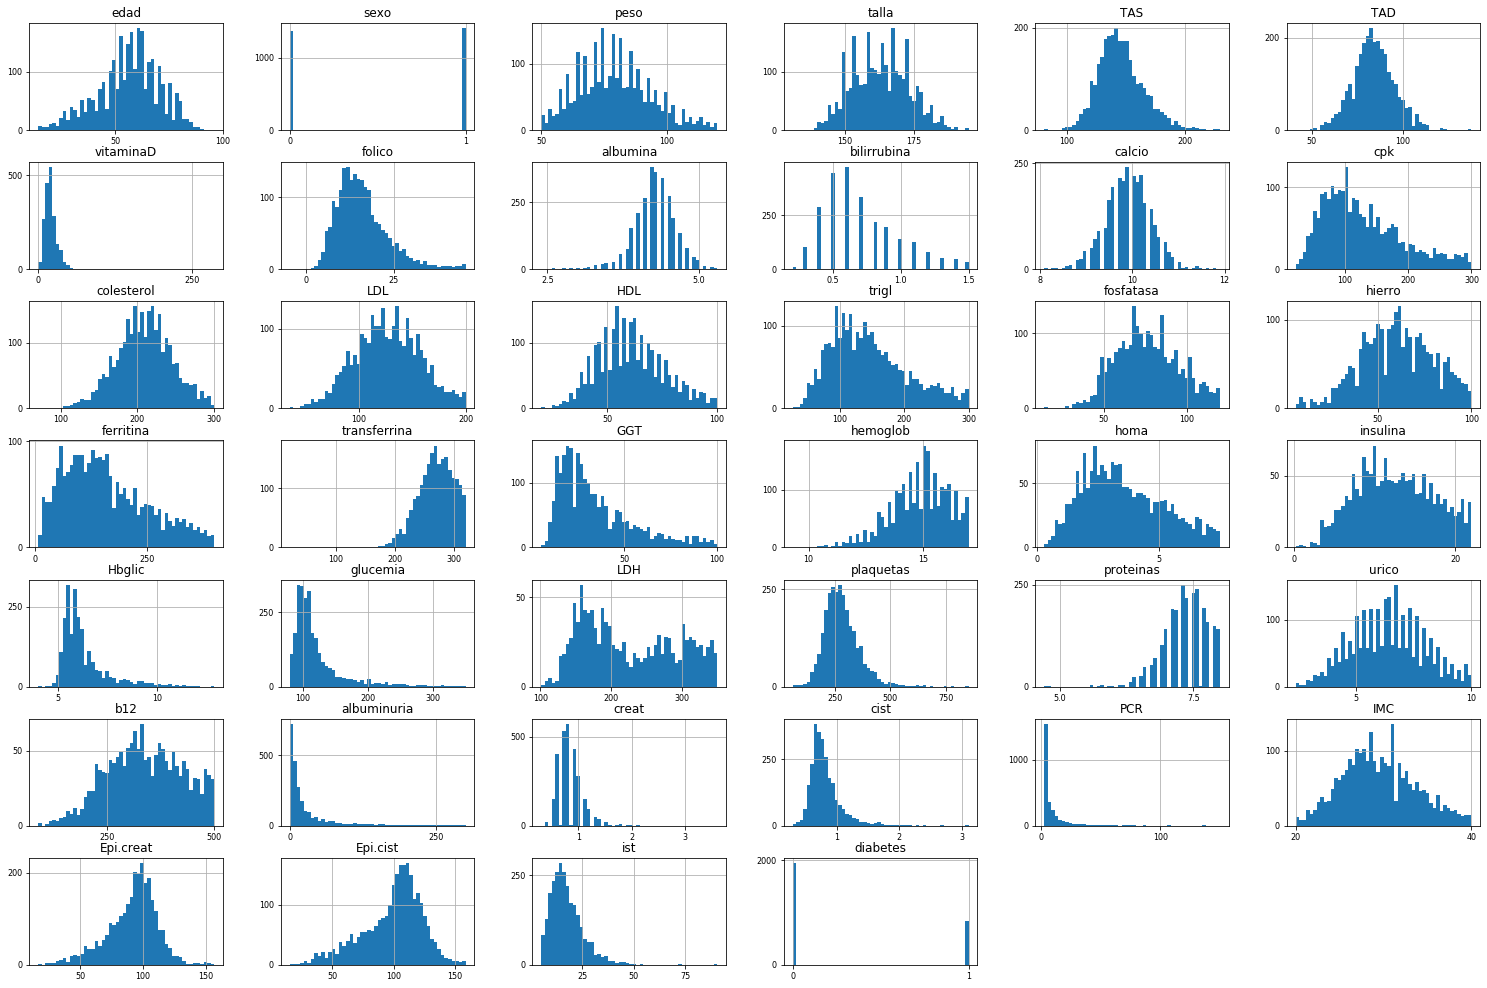

In [51]:

# Histogram Train
X = patient_data.drop(['enfermedad'],axis=1)

foo = X.hist(figsize=(26, 25), bins=50, xlabelsize=8, ylabelsize=8,layout = (10,6))

In [52]:
from sklearn.model_selection import train_test_split
X = patient_data.drop(['enfermedad'],axis=1)
y = patient_data.enfermedad
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)

In [53]:
X_train

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes
1469,50.0,1,81.0,164.0,133.0,85,NaN,NaN,5.0,0.5,9.8,128.0,180.0,91.0,69.0,102.0,94.0,70.0,290.0,242.0,19.0,16.3,5.58,19.0,NaN,119.0,NaN,209.0,7.8,5.1,NaN,0.043,0.8,0.63,3.00,30.1,104.161020,122.627968,20.5,0
2274,63.0,0,60.0,154.0,145.0,77,25.0,27.5,4.7,0.7,9.9,77.0,254.0,153.0,89.0,71.0,98.0,74.0,132.0,289.0,14.0,12.1,3.06,11.8,5.5,106.0,174.0,203.0,7.8,4.3,438.0,7.230,0.7,0.73,5.73,25.3,92.208200,100.797479,18.2,0
423,57.0,1,83.0,169.0,142.0,96,16.0,11.7,4.0,0.9,9.8,NaN,173.0,88.0,85.0,184.0,80.0,67.0,217.0,318.0,NaN,NaN,3.63,9.3,9.0,191.0,NaN,227.0,7.9,6.8,244.0,126.570,1.0,1.04,3.44,29.1,83.177425,74.699408,15.0,1
1529,33.0,0,110.0,166.0,117.0,63,8.0,4.4,4.0,0.3,8.7,61.0,219.0,NaN,44.0,NaN,48.0,75.0,73.0,259.0,21.0,11.4,5.53,NaN,5.7,90.0,NaN,278.0,6.1,5.0,122.0,NaN,0.6,0.53,8.80,39.9,119.761599,133.368715,20.6,0
934,68.0,0,75.0,154.0,141.0,82,16.0,11.5,4.5,0.7,10.7,200.0,248.0,147.0,72.0,156.0,102.0,85.0,137.0,NaN,64.0,15.1,4.52,16.8,6.0,110.0,NaN,273.0,7.5,5.7,320.0,0.000,0.7,0.92,3.44,31.6,89.025780,78.396348,17.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,51.0,1,83.0,174.0,132.0,86,NaN,NaN,4.7,0.8,10.1,127.0,270.0,187.0,58.0,137.0,67.0,91.0,110.0,270.0,NaN,NaN,1.54,6.5,NaN,105.0,277.0,352.0,7.8,5.6,NaN,0.000,1.0,NaN,3.30,27.4,86.758089,NaN,23.9,0
721,49.0,0,70.0,169.0,100.0,72,16.0,11.1,4.1,0.8,10.5,121.0,264.0,174.0,97.0,117.0,79.0,59.0,141.0,252.0,12.0,15.6,2.71,11.3,6.0,112.0,314.0,237.0,7.3,5.8,364.8,23.490,0.9,0.75,3.45,24.5,75.080024,105.186855,16.6,0
2529,59.0,1,74.0,167.0,136.0,82,NaN,12.6,4.5,0.4,10.4,86.0,203.0,118.0,62.0,195.0,71.0,94.0,63.0,NaN,71.0,NaN,6.02,NaN,5.7,123.0,278.0,326.0,7.7,7.5,276.6,131.240,0.9,0.80,3.22,26.5,93.158991,104.991130,19.6,0
178,54.0,1,83.0,166.0,150.0,98,18.0,6.5,4.3,1.4,10.0,NaN,258.0,168.0,70.0,146.0,97.0,70.0,161.0,284.0,39.0,16.4,4.15,12.0,6.3,146.0,332.0,307.0,7.6,8.4,287.4,NaN,1.0,0.69,3.45,30.1,84.948893,115.321989,17.5,1


In [54]:
# X_train CLEAN
X_train_clean=X_train.copy()
columns_name=list(X_train.columns)
for i in columns_name:
    X_train_clean[i]= X_train_clean[i].replace({np.nan: np.nanmedian(X_train[i])})
    

In [55]:
X_train_clean

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes
1469,50.0,1,81.0,164.0,133.0,85,19.0,14.805,5.0,0.5,9.8,128.0,180.0,91.0,69.0,102.0,94.0,70.0,290.0,242.0,19.0,16.3,5.58,19.0,5.9,119.0,212.0,209.0,7.8,5.1,336.35,0.043,0.8,0.63,3.00,30.1,104.161020,122.627968,20.5,0
2274,63.0,0,60.0,154.0,145.0,77,25.0,27.500,4.7,0.7,9.9,77.0,254.0,153.0,89.0,71.0,98.0,74.0,132.0,289.0,14.0,12.1,3.06,11.8,5.5,106.0,174.0,203.0,7.8,4.3,438.00,7.230,0.7,0.73,5.73,25.3,92.208200,100.797479,18.2,0
423,57.0,1,83.0,169.0,142.0,96,16.0,11.700,4.0,0.9,9.8,113.0,173.0,88.0,85.0,184.0,80.0,67.0,217.0,318.0,28.5,14.9,3.63,9.3,9.0,191.0,212.0,227.0,7.9,6.8,244.00,126.570,1.0,1.04,3.44,29.1,83.177425,74.699408,15.0,1
1529,33.0,0,110.0,166.0,117.0,63,8.0,4.400,4.0,0.3,8.7,61.0,219.0,126.0,44.0,135.0,48.0,75.0,73.0,259.0,21.0,11.4,5.53,12.1,5.7,90.0,212.0,278.0,6.1,5.0,122.00,12.530,0.6,0.53,8.80,39.9,119.761599,133.368715,20.6,0
934,68.0,0,75.0,154.0,141.0,82,16.0,11.500,4.5,0.7,10.7,200.0,248.0,147.0,72.0,156.0,102.0,85.0,137.0,271.0,64.0,15.1,4.52,16.8,6.0,110.0,212.0,273.0,7.5,5.7,320.00,0.000,0.7,0.92,3.44,31.6,89.025780,78.396348,17.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,51.0,1,83.0,174.0,132.0,86,19.0,14.805,4.7,0.8,10.1,127.0,270.0,187.0,58.0,137.0,67.0,91.0,110.0,270.0,28.5,14.9,1.54,6.5,5.9,105.0,277.0,352.0,7.8,5.6,336.35,0.000,1.0,0.76,3.30,27.4,86.758089,104.235412,23.9,0
721,49.0,0,70.0,169.0,100.0,72,16.0,11.100,4.1,0.8,10.5,121.0,264.0,174.0,97.0,117.0,79.0,59.0,141.0,252.0,12.0,15.6,2.71,11.3,6.0,112.0,314.0,237.0,7.3,5.8,364.80,23.490,0.9,0.75,3.45,24.5,75.080024,105.186855,16.6,0
2529,59.0,1,74.0,167.0,136.0,82,19.0,12.600,4.5,0.4,10.4,86.0,203.0,118.0,62.0,195.0,71.0,94.0,63.0,271.0,71.0,14.9,6.02,12.1,5.7,123.0,278.0,326.0,7.7,7.5,276.60,131.240,0.9,0.80,3.22,26.5,93.158991,104.991130,19.6,0
178,54.0,1,83.0,166.0,150.0,98,18.0,6.500,4.3,1.4,10.0,113.0,258.0,168.0,70.0,146.0,97.0,70.0,161.0,284.0,39.0,16.4,4.15,12.0,6.3,146.0,332.0,307.0,7.6,8.4,287.40,12.530,1.0,0.69,3.45,30.1,84.948893,115.321989,17.5,1


In [56]:
X_test

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes
2385,40.0,1,82.0,175.0,151.0,92,33.0,13.5,5.0,0.4,9.7,189.0,219.0,163.0,40.0,81.0,NaN,88.0,168.0,286.0,NaN,15.9,1.80,8.6,5.6,85.0,NaN,229.0,7.6,6.7,408.0,5.51,1.3,0.77,3.02,26.8,68.251269,115.480381,21.8,0
1005,72.0,0,82.0,151.0,117.0,77,33.0,6.5,4.0,1.0,9.7,NaN,179.0,105.0,62.0,108.0,76.0,76.0,294.0,NaN,44.0,15.2,NaN,NaN,5.9,98.0,212.0,247.0,6.9,7.9,NaN,12.96,0.7,0.92,5.62,36.0,86.559110,77.149513,15.8,0
2506,34.0,1,77.0,178.0,122.0,66,NaN,NaN,4.3,0.6,9.3,NaN,215.0,130.0,42.0,213.0,NaN,NaN,394.0,235.0,29.0,14.5,NaN,NaN,NaN,84.0,NaN,287.0,7.4,4.9,NaN,NaN,0.9,NaN,3.30,24.3,111.043607,NaN,47.1,0
73,51.0,1,106.0,177.0,122.0,90,19.0,7.1,4.3,0.9,10.2,194.0,268.0,148.0,71.0,226.0,NaN,85.0,NaN,286.0,NaN,17.0,4.37,16.8,6.0,118.0,300.0,402.0,NaN,8.1,299.0,13.23,0.7,0.75,13.30,33.8,109.267036,111.960346,21.1,0
1045,59.0,1,117.0,167.0,163.0,89,17.0,18.0,4.6,0.4,9.5,127.0,187.0,110.0,55.0,108.0,60.0,87.0,167.0,228.0,40.0,12.5,NaN,NaN,6.4,110.0,NaN,309.0,7.6,6.6,372.0,36.00,1.0,0.95,16.00,NaN,82.017017,83.567837,27.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,46.0,0,69.0,168.0,129.0,83,15.0,13.5,4.7,0.3,10.0,100.0,242.0,165.0,55.0,111.0,NaN,64.0,55.0,NaN,21.0,13.9,5.31,21.5,5.9,100.0,NaN,264.0,7.9,4.9,310.0,10.00,0.8,0.62,3.17,24.4,88.413800,117.067292,13.5,0
1978,52.0,0,NaN,166.0,131.0,80,NaN,NaN,4.0,0.2,9.3,105.0,204.0,150.0,53.0,155.0,111.0,49.0,55.0,238.0,22.0,13.3,3.19,13.9,NaN,96.0,NaN,398.0,7.3,6.5,NaN,88.30,0.9,NaN,9.59,NaN,73.514355,NaN,14.6,0
964,84.0,1,71.0,153.0,145.0,78,13.0,11.8,3.0,NaN,9.3,157.0,196.0,128.0,64.0,80.0,69.0,28.0,104.0,266.0,42.0,14.1,3.43,12.3,5.8,120.0,296.0,177.0,6.6,6.9,NaN,31.40,0.7,0.72,19.00,30.3,86.659138,100.108063,7.5,0
1875,86.0,0,54.0,131.0,135.0,70,27.0,33.2,4.9,0.7,10.1,83.0,213.0,120.0,73.0,102.0,71.0,74.0,201.0,306.0,25.0,16.3,3.24,11.5,6.3,114.0,NaN,298.0,7.5,5.7,NaN,NaN,0.6,0.85,3.34,31.5,82.533023,81.022535,17.2,0


In [57]:
#X_test

In [58]:
# X_test CLEAN
X_test_clean=X_test.copy()
columns_name=list(X_test.columns)
for i in columns_name:
    X_test_clean[i]= X_test_clean[i].replace({np.nan: np.nanmedian(X_train[i])})

In [59]:
X_test_clean

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes
2385,40.0,1,82.0,175.0,151.0,92,33.0,13.500,5.0,0.4,9.7,189.0,219.0,163.0,40.0,81.0,75.0,88.0,168.0,286.0,28.5,15.9,1.80,8.6,5.6,85.0,212.0,229.0,7.6,6.7,408.00,5.51,1.3,0.77,3.02,26.8,68.251269,115.480381,21.8,0
1005,72.0,0,82.0,151.0,117.0,77,33.0,6.500,4.0,1.0,9.7,113.0,179.0,105.0,62.0,108.0,76.0,76.0,294.0,271.0,44.0,15.2,3.30,12.1,5.9,98.0,212.0,247.0,6.9,7.9,336.35,12.96,0.7,0.92,5.62,36.0,86.559110,77.149513,15.8,0
2506,34.0,1,77.0,178.0,122.0,66,19.0,14.805,4.3,0.6,9.3,113.0,215.0,130.0,42.0,213.0,75.0,60.0,394.0,235.0,29.0,14.5,3.30,12.1,5.9,84.0,212.0,287.0,7.4,4.9,336.35,12.53,0.9,0.76,3.30,24.3,111.043607,104.235412,47.1,0
73,51.0,1,106.0,177.0,122.0,90,19.0,7.100,4.3,0.9,10.2,194.0,268.0,148.0,71.0,226.0,75.0,85.0,142.0,286.0,28.5,17.0,4.37,16.8,6.0,118.0,300.0,402.0,7.4,8.1,299.00,13.23,0.7,0.75,13.30,33.8,109.267036,111.960346,21.1,0
1045,59.0,1,117.0,167.0,163.0,89,17.0,18.000,4.6,0.4,9.5,127.0,187.0,110.0,55.0,108.0,60.0,87.0,167.0,228.0,40.0,12.5,3.30,12.1,6.4,110.0,212.0,309.0,7.6,6.6,372.00,36.00,1.0,0.95,16.00,29.1,82.017017,83.567837,27.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,46.0,0,69.0,168.0,129.0,83,15.0,13.500,4.7,0.3,10.0,100.0,242.0,165.0,55.0,111.0,75.0,64.0,55.0,271.0,21.0,13.9,5.31,21.5,5.9,100.0,212.0,264.0,7.9,4.9,310.00,10.00,0.8,0.62,3.17,24.4,88.413800,117.067292,13.5,0
1978,52.0,0,78.0,166.0,131.0,80,19.0,14.805,4.0,0.2,9.3,105.0,204.0,150.0,53.0,155.0,111.0,49.0,55.0,238.0,22.0,13.3,3.19,13.9,5.9,96.0,212.0,398.0,7.3,6.5,336.35,88.30,0.9,0.76,9.59,29.1,73.514355,104.235412,14.6,0
964,84.0,1,71.0,153.0,145.0,78,13.0,11.800,3.0,0.6,9.3,157.0,196.0,128.0,64.0,80.0,69.0,28.0,104.0,266.0,42.0,14.1,3.43,12.3,5.8,120.0,296.0,177.0,6.6,6.9,336.35,31.40,0.7,0.72,19.00,30.3,86.659138,100.108063,7.5,0
1875,86.0,0,54.0,131.0,135.0,70,27.0,33.200,4.9,0.7,10.1,83.0,213.0,120.0,73.0,102.0,71.0,74.0,201.0,306.0,25.0,16.3,3.24,11.5,6.3,114.0,212.0,298.0,7.5,5.7,336.35,12.53,0.6,0.85,3.34,31.5,82.533023,81.022535,17.2,0


### 5. Distribución de las variables. Histogramas

A continuación representaremos la distibución de las siguientes variables para entender mejor los datos.

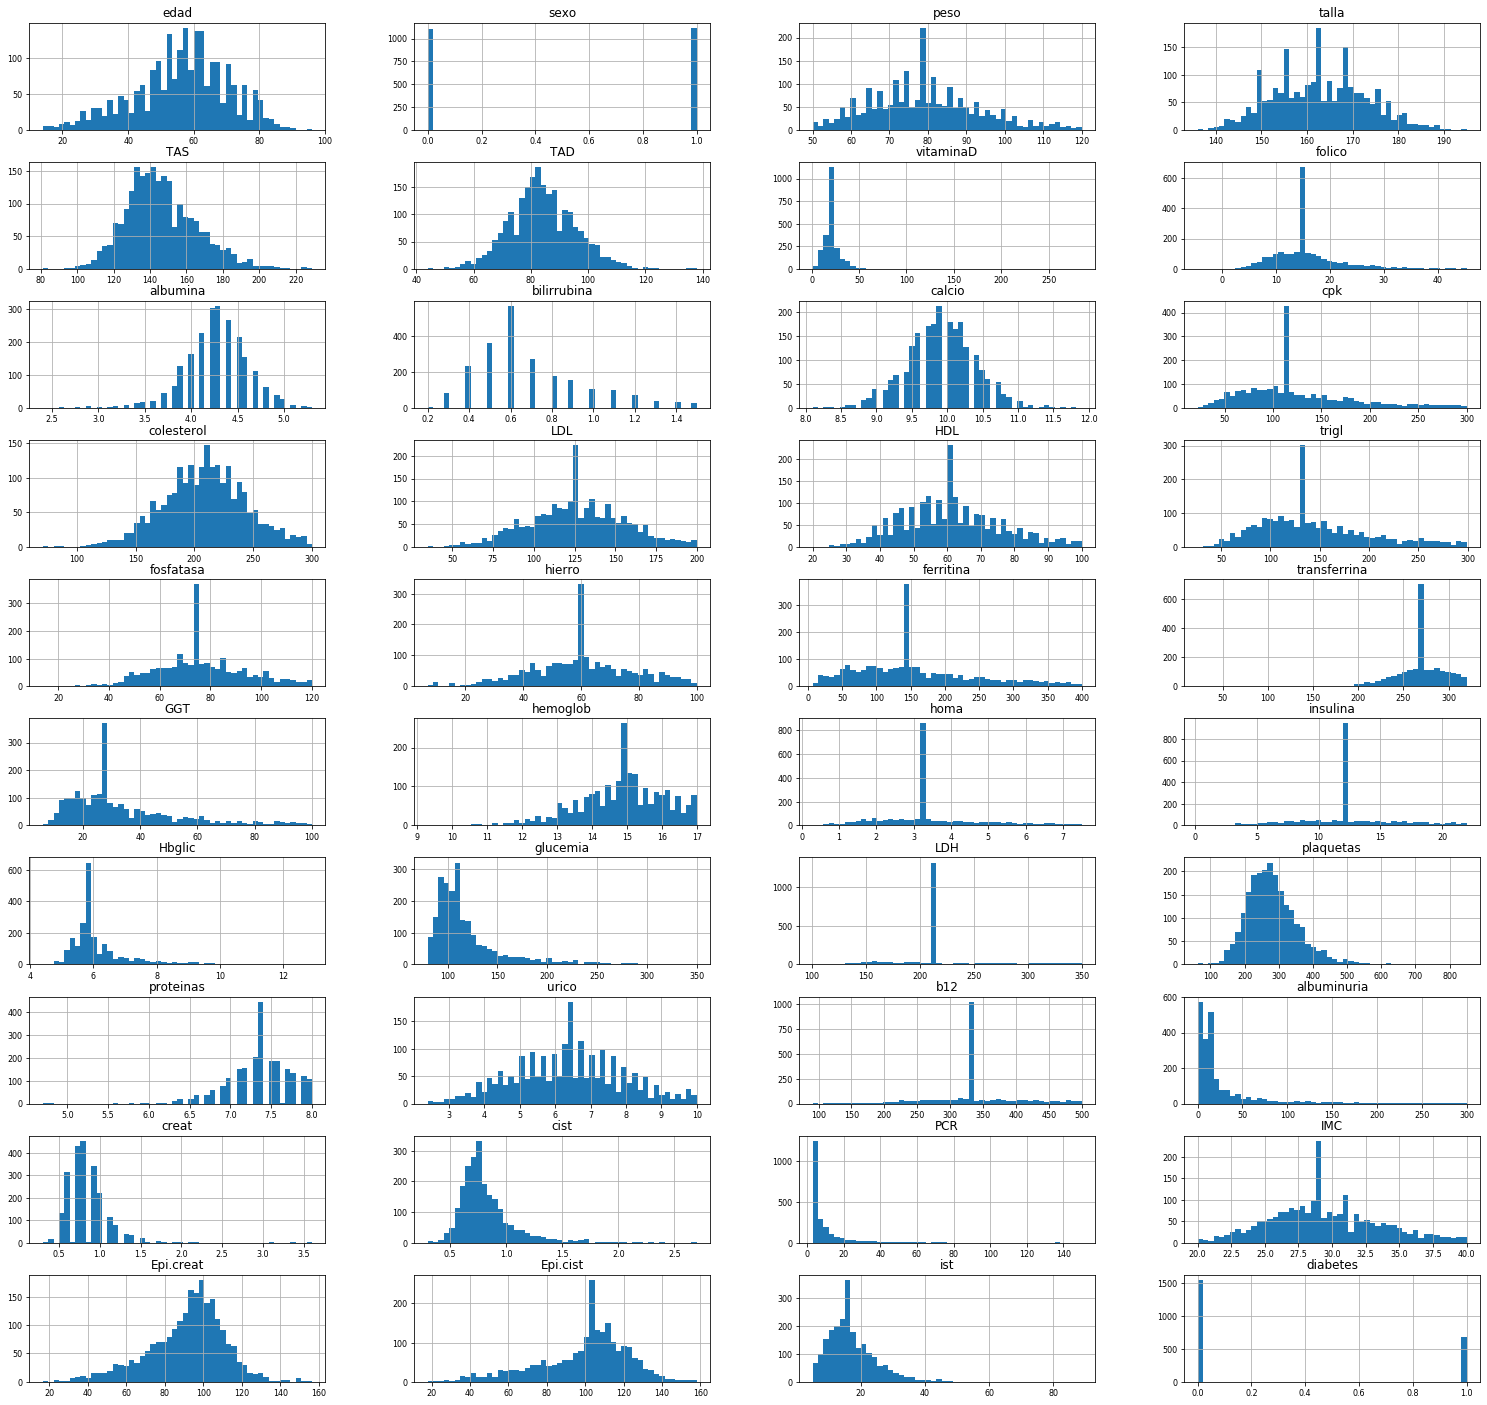

In [60]:
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
# Histogram Train
variables_histograma=X_train_clean
foo = variables_histograma.hist(figsize=(26, 25), bins=50, xlabelsize=8, ylabelsize=8,layout = (10,4))

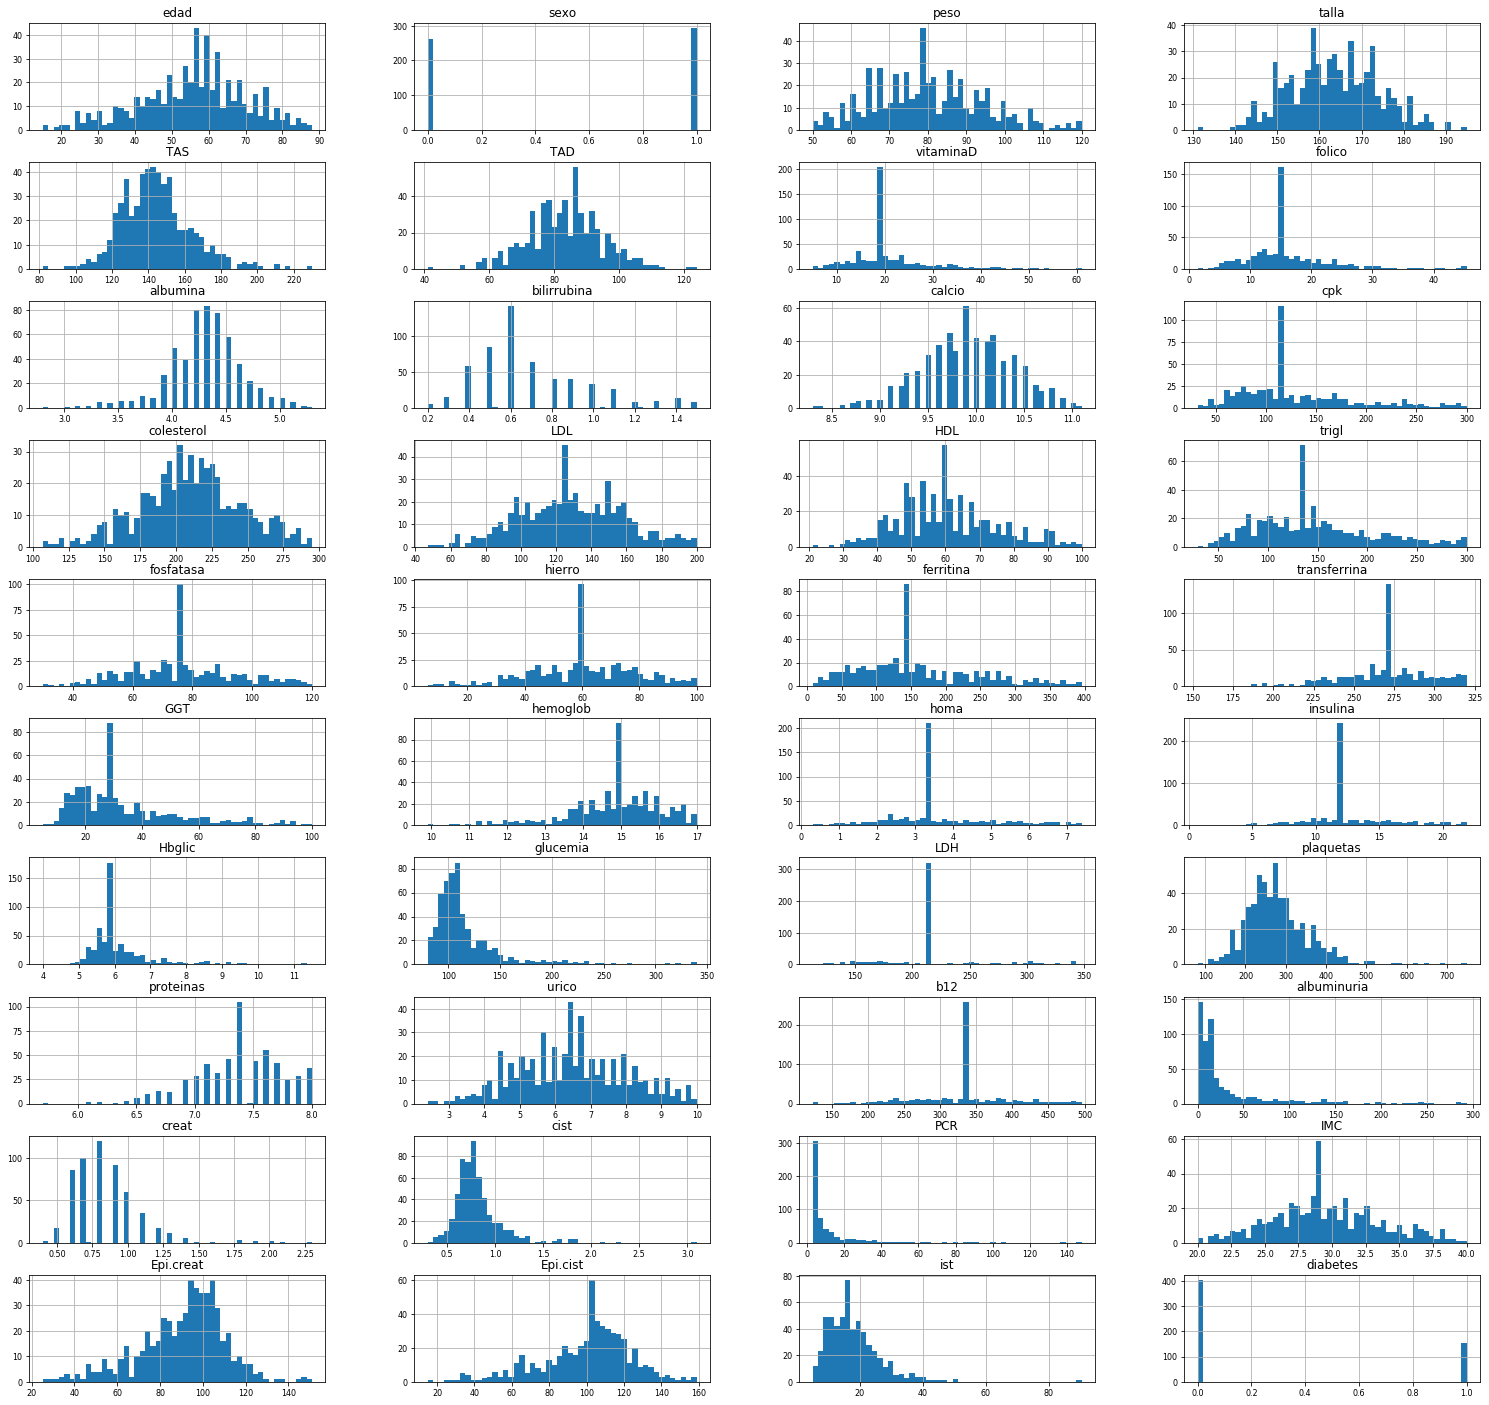

In [61]:
# Histogram Test
variables_histograma=X_test_clean
foo = variables_histograma.hist(figsize=(26, 25), bins=50, xlabelsize=8, ylabelsize=8,layout = (10,4))

### 6. Transformación de variables caida exponencial

El método a seguir consistirá en realizar una transformación logarítmica sobre aquellas variables con histogramas con decaimiento exponencial. De esta forma se consigue, en su cierta medida, que sus distribuciones de datos se conviertan en simétricas. Se evaluará si estas tranformaciones logarítmicas tienen un efecto beneficioso en la capacidad predictiva del modelo diseñado.

In [62]:
X_train_transformed=X_train_clean.copy()
X_test_transformed=X_test_clean.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D8B52088>]],
      dtype=object)

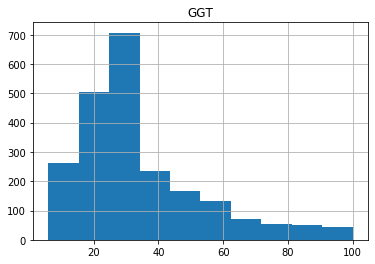

<Figure size 432x288 with 0 Axes>

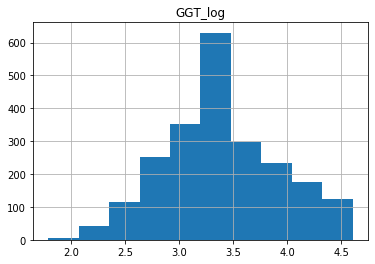

In [63]:
#ggt
X_train_transformed.hist('GGT')

#create new variable log ggt

X_train_transformed['GGT_log'] = np.log(X_train_transformed['GGT'])
X_test_transformed['GGT_log'] = np.log(X_test_transformed['GGT'])
X_train_transformed['GGT_log'].describe()

#print(patient_data_transformed['Hbglic'].describe())
#print(patient_data_transformed['Hbglic_log'].describe())

plt.figure()
X_train_transformed.hist('GGT_log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D909F408>]],
      dtype=object)

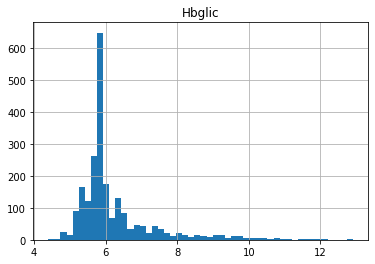

<Figure size 432x288 with 0 Axes>

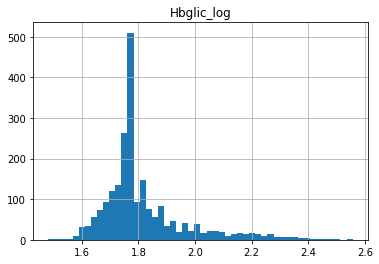

In [64]:
#hbglic

X_train_transformed.hist('Hbglic',bins = 50)

#create new variable log ggt

X_train_transformed['Hbglic_log'] = np.log(X_train_transformed['Hbglic'])
X_test_transformed['Hbglic_log'] = np.log(X_test_transformed['Hbglic'])
#print(patient_data_transformed['Hbglic'].describe())
#print(patient_data_transformed['Hbglic_log'].describe())

plt.figure()
X_train_transformed.hist('Hbglic_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6DC360E48>]],
      dtype=object)

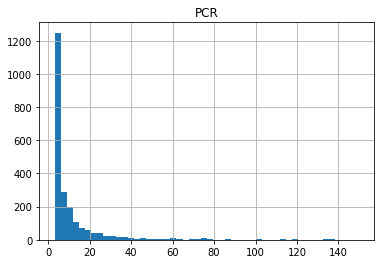

<Figure size 432x288 with 0 Axes>

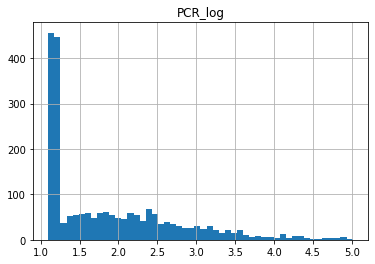

In [65]:
#PCR

X_train_transformed.hist('PCR',bins = 50)

#create new variable log ggt

X_train_transformed['PCR_log'] = np.log(X_train_transformed['PCR'])
X_test_transformed['PCR_log'] = np.log(X_test_transformed['PCR'])
#print(patient_data_transformed['PCR'].describe())
#print(patient_data_transformed['PCR'].describe())

plt.figure()
X_train_transformed.hist('PCR_log',bins = 50)

count    2227.000000
mean        4.266098
std         0.349302
min         2.400000
25%         4.100000
50%         4.300000
75%         4.500000
max         5.300000
Name: albumina, dtype: float64
count    2227.000000
mean        1.658993
std         0.068643
min         1.223775
25%         1.629241
50%         1.667707
75%         1.704748
max         1.840550
Name: albumina_log, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D9A1C848>]],
      dtype=object)

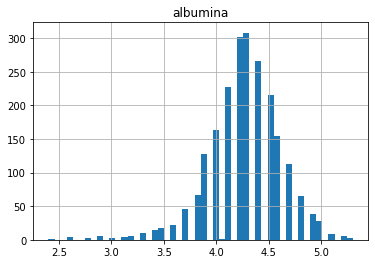

<Figure size 432x288 with 0 Axes>

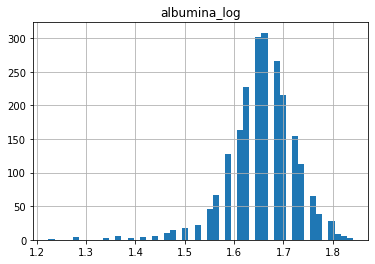

In [66]:
#albumina

X_train_transformed.hist('albumina',bins = 50)

#create new variable log ggt

X_train_transformed['albumina_log'] = np.log(X_train_transformed['albumina']+1)
X_test_transformed['albumina_log'] = np.log(X_test_transformed['albumina']+1)
print(X_train_transformed['albumina'].describe())
print(X_train_transformed['albumina_log'].describe())

plt.figure()
X_train_transformed.hist('albumina_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D862B488>]],
      dtype=object)

<Figure size 720x576 with 0 Axes>

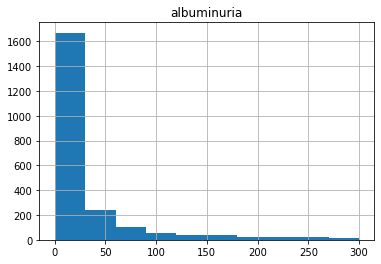

<Figure size 432x288 with 0 Axes>

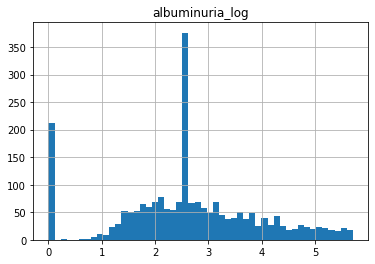

In [67]:
#albuminuria

plt.figure(figsize=(10,8))
#patient_data_transformed.hist('albuminuria',bins = 100,figsize=(10,8))
X_train_transformed.hist('albuminuria')
#create new variable log ggt

X_train_transformed['albuminuria_log'] = np.log(X_train_transformed['albuminuria']+1)
X_test_transformed['albuminuria_log'] = np.log(X_test_transformed['albuminuria']+1)
#print(patient_data_transformed['albuminuria'].describe())
#print(patient_data_transformed['albuminuria_log'].describe())
#print(sum(np.abs(patient_data_transformed['albuminuria']-0)<1))
plt.figure()
X_train_transformed.hist('albuminuria_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D9ABBD08>]],
      dtype=object)

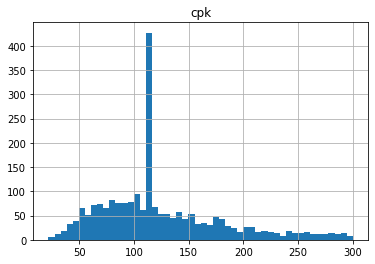

<Figure size 432x288 with 0 Axes>

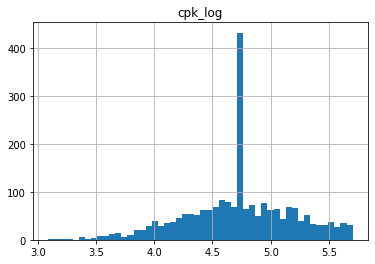

In [68]:
#cpk

X_train_transformed.hist('cpk',bins = 50)

#create new variable log ggt

X_train_transformed['cpk_log'] = np.log(X_train_transformed['cpk'])
X_test_transformed['cpk_log'] = np.log(X_test_transformed['cpk'])
#print(patient_data_transformed['cpk'].describe())
#print(patient_data_transformed['cpk'].describe())

plt.figure()
X_train_transformed.hist('cpk_log',bins = 50)#

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D86CFB48>]],
      dtype=object)

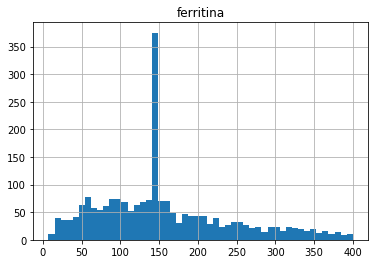

<Figure size 432x288 with 0 Axes>

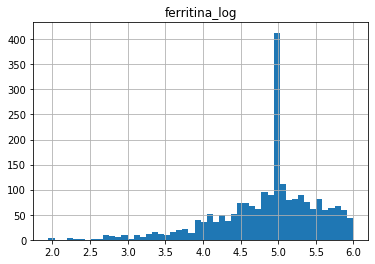

In [69]:
#ferritina

X_train_transformed.hist('ferritina',bins = 50)

#create new variable log ggt

X_train_transformed['ferritina_log'] = np.log(X_train_transformed['ferritina'])
X_test_transformed['ferritina_log'] = np.log(X_test_transformed['ferritina'])
#print(patient_data_transformed['ferritina'].describe())
#print(patient_data_transformed['ferritina_log'].describe())

plt.figure()
X_train_transformed.hist('ferritina_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D9BBFF88>]],
      dtype=object)

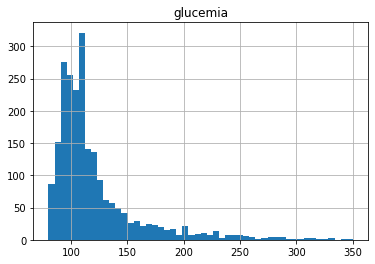

<Figure size 432x288 with 0 Axes>

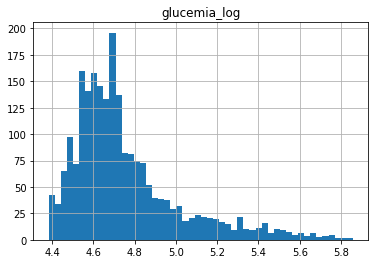

In [70]:
#glucemia
X_train_transformed.hist('glucemia',bins = 50)

#create new variable log ggt

X_train_transformed['glucemia_log'] = np.log(X_train_transformed['glucemia'])
X_test_transformed['glucemia_log'] = np.log(X_test_transformed['glucemia'])
#print(patient_data_transformed['ferritina'].describe())
#print(patient_data_transformed['ferritina_log'].describe())

plt.figure()
X_train_transformed.hist('glucemia_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6DAAC7608>]],
      dtype=object)

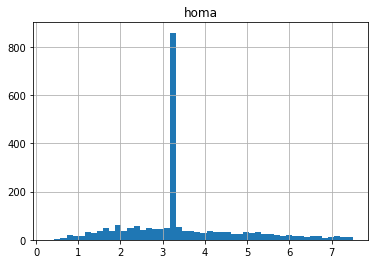

<Figure size 432x288 with 0 Axes>

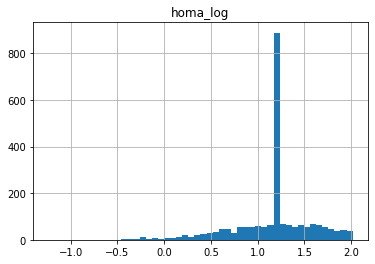

In [71]:
#homa

X_train_transformed.hist('homa',bins = 50)

#create new variable log ggt

X_train_transformed['homa_log'] = np.log(X_train_transformed['homa'])
X_test_transformed['homa_log'] = np.log(X_test_transformed['homa'])

#print(patient_data_transformed['homa'].describe())
#print(patient_data_transformed['homa_log'].describe())

plt.figure()
X_train_transformed.hist('homa_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D9FDE108>]],
      dtype=object)

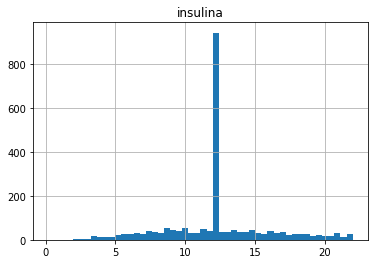

<Figure size 432x288 with 0 Axes>

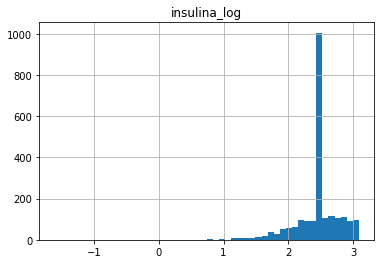

In [72]:
#ferritina

X_train_transformed.hist('insulina',bins = 50)

#create new variable log ggt

X_train_transformed['insulina_log'] = np.log(X_train_transformed['insulina'])
X_test_transformed['insulina_log'] = np.log(X_test_transformed['insulina'])

#print(patient_data_transformed['insulina'].describe())
#print(patient_data_transformed['insulina_log'].describe())

plt.figure()
X_train_transformed.hist('insulina_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6DC2A6908>]],
      dtype=object)

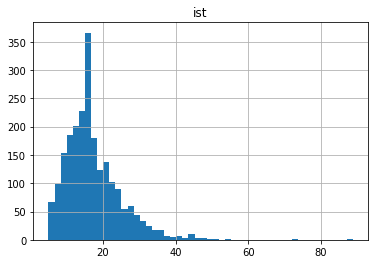

<Figure size 432x288 with 0 Axes>

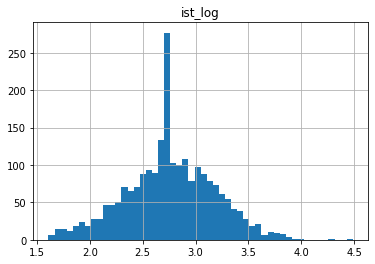

In [73]:
#ist

X_train_transformed.hist('ist',bins = 50)

#create new variable
X_train_transformed['ist_log'] = np.log(X_train_transformed['ist'])
X_test_transformed['ist_log'] = np.log(X_test_transformed['ist'])
#print(patient_data_transformed['ist'].describe())
#print(patient_data_transformed['ist_log'].describe())

plt.figure()
X_train_transformed.hist('ist_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6DC9DAB88>]],
      dtype=object)

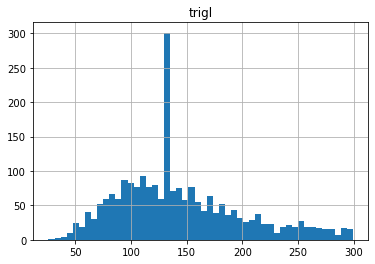

<Figure size 432x288 with 0 Axes>

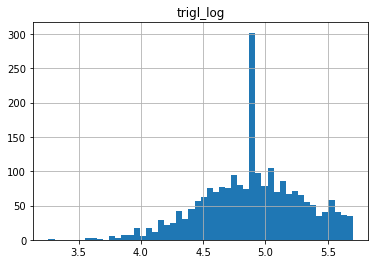

In [74]:
#trigl

X_train_transformed.hist('trigl',bins = 50)

#create new variable

X_train_transformed['trigl_log'] = np.log(X_train_transformed['trigl'])
X_test_transformed['trigl_log'] = np.log(X_test_transformed['trigl'])
#print(patient_data_transformed['ist'].describe())
#print(patient_data_transformed['ist_log'].describe())

plt.figure()
X_train_transformed.hist('trigl_log',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6D6B45B08>]],
      dtype=object)

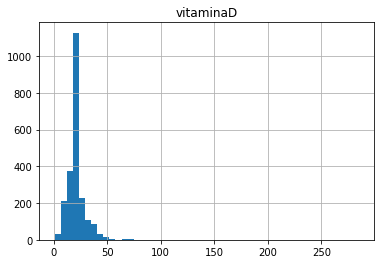

<Figure size 432x288 with 0 Axes>

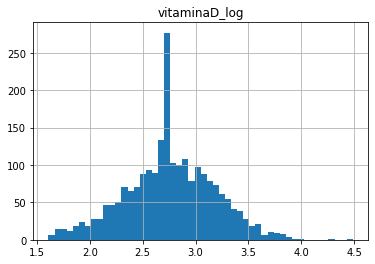

In [75]:
#vitaminaD

X_train_transformed.hist('vitaminaD',bins = 50)

#create new variable

X_train_transformed['vitaminaD_log'] = np.log(X_train_transformed['ist'])
X_test_transformed['vitaminaD_log'] = np.log(X_test_transformed['ist'])

#print(patient_data_transformed['ist'].describe())
#print(patient_data_transformed['ist_log'].describe())

plt.figure()
X_train_transformed.hist('vitaminaD_log',bins = 50)

In [76]:
X_train_clean

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes
1469,50.0,1,81.0,164.0,133.0,85,19.0,14.805,5.0,0.5,9.8,128.0,180.0,91.0,69.0,102.0,94.0,70.0,290.0,242.0,19.0,16.3,5.58,19.0,5.9,119.0,212.0,209.0,7.8,5.1,336.35,0.043,0.8,0.63,3.00,30.1,104.161020,122.627968,20.5,0
2274,63.0,0,60.0,154.0,145.0,77,25.0,27.500,4.7,0.7,9.9,77.0,254.0,153.0,89.0,71.0,98.0,74.0,132.0,289.0,14.0,12.1,3.06,11.8,5.5,106.0,174.0,203.0,7.8,4.3,438.00,7.230,0.7,0.73,5.73,25.3,92.208200,100.797479,18.2,0
423,57.0,1,83.0,169.0,142.0,96,16.0,11.700,4.0,0.9,9.8,113.0,173.0,88.0,85.0,184.0,80.0,67.0,217.0,318.0,28.5,14.9,3.63,9.3,9.0,191.0,212.0,227.0,7.9,6.8,244.00,126.570,1.0,1.04,3.44,29.1,83.177425,74.699408,15.0,1
1529,33.0,0,110.0,166.0,117.0,63,8.0,4.400,4.0,0.3,8.7,61.0,219.0,126.0,44.0,135.0,48.0,75.0,73.0,259.0,21.0,11.4,5.53,12.1,5.7,90.0,212.0,278.0,6.1,5.0,122.00,12.530,0.6,0.53,8.80,39.9,119.761599,133.368715,20.6,0
934,68.0,0,75.0,154.0,141.0,82,16.0,11.500,4.5,0.7,10.7,200.0,248.0,147.0,72.0,156.0,102.0,85.0,137.0,271.0,64.0,15.1,4.52,16.8,6.0,110.0,212.0,273.0,7.5,5.7,320.00,0.000,0.7,0.92,3.44,31.6,89.025780,78.396348,17.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,51.0,1,83.0,174.0,132.0,86,19.0,14.805,4.7,0.8,10.1,127.0,270.0,187.0,58.0,137.0,67.0,91.0,110.0,270.0,28.5,14.9,1.54,6.5,5.9,105.0,277.0,352.0,7.8,5.6,336.35,0.000,1.0,0.76,3.30,27.4,86.758089,104.235412,23.9,0
721,49.0,0,70.0,169.0,100.0,72,16.0,11.100,4.1,0.8,10.5,121.0,264.0,174.0,97.0,117.0,79.0,59.0,141.0,252.0,12.0,15.6,2.71,11.3,6.0,112.0,314.0,237.0,7.3,5.8,364.80,23.490,0.9,0.75,3.45,24.5,75.080024,105.186855,16.6,0
2529,59.0,1,74.0,167.0,136.0,82,19.0,12.600,4.5,0.4,10.4,86.0,203.0,118.0,62.0,195.0,71.0,94.0,63.0,271.0,71.0,14.9,6.02,12.1,5.7,123.0,278.0,326.0,7.7,7.5,276.60,131.240,0.9,0.80,3.22,26.5,93.158991,104.991130,19.6,0
178,54.0,1,83.0,166.0,150.0,98,18.0,6.500,4.3,1.4,10.0,113.0,258.0,168.0,70.0,146.0,97.0,70.0,161.0,284.0,39.0,16.4,4.15,12.0,6.3,146.0,332.0,307.0,7.6,8.4,287.40,12.530,1.0,0.69,3.45,30.1,84.948893,115.321989,17.5,1


In [77]:
X_train_transformed

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,...,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,GGT_log,Hbglic_log,PCR_log,albumina_log,albuminuria_log,cpk_log,ferritina_log,glucemia_log,homa_log,insulina_log,ist_log,trigl_log,vitaminaD_log
1469,50.0,1,81.0,164.0,133.0,85,19.0,14.805,5.0,0.5,9.8,128.0,180.0,91.0,69.0,102.0,94.0,70.0,290.0,242.0,19.0,16.3,5.58,19.0,5.9,...,7.8,5.1,336.35,0.043,0.8,0.63,3.00,30.1,104.161020,122.627968,20.5,0,2.944439,1.774952,1.098612,1.791759,0.042101,4.852030,5.669881,4.779123,1.719189,2.944439,3.020425,4.624973,3.020425
2274,63.0,0,60.0,154.0,145.0,77,25.0,27.500,4.7,0.7,9.9,77.0,254.0,153.0,89.0,71.0,98.0,74.0,132.0,289.0,14.0,12.1,3.06,11.8,5.5,...,7.8,4.3,438.00,7.230,0.7,0.73,5.73,25.3,92.208200,100.797479,18.2,0,2.639057,1.704748,1.745716,1.740466,2.107786,4.343805,4.882802,4.663439,1.118415,2.468100,2.901422,4.262680,2.901422
423,57.0,1,83.0,169.0,142.0,96,16.0,11.700,4.0,0.9,9.8,113.0,173.0,88.0,85.0,184.0,80.0,67.0,217.0,318.0,28.5,14.9,3.63,9.3,9.0,...,7.9,6.8,244.00,126.570,1.0,1.04,3.44,29.1,83.177425,74.699408,15.0,1,3.349904,2.197225,1.235471,1.609438,4.848665,4.727388,5.379897,5.252273,1.289233,2.230014,2.708050,5.214936,2.708050
1529,33.0,0,110.0,166.0,117.0,63,8.0,4.400,4.0,0.3,8.7,61.0,219.0,126.0,44.0,135.0,48.0,75.0,73.0,259.0,21.0,11.4,5.53,12.1,5.7,...,6.1,5.0,122.00,12.530,0.6,0.53,8.80,39.9,119.761599,133.368715,20.6,0,3.044522,1.740466,2.174752,1.609438,2.604909,4.110874,4.290459,4.499810,1.710188,2.493205,3.025291,4.905275,3.025291
934,68.0,0,75.0,154.0,141.0,82,16.0,11.500,4.5,0.7,10.7,200.0,248.0,147.0,72.0,156.0,102.0,85.0,137.0,271.0,64.0,15.1,4.52,16.8,6.0,...,7.5,5.7,320.00,0.000,0.7,0.92,3.44,31.6,89.025780,78.396348,17.8,0,4.158883,1.791759,1.235471,1.704748,0.000000,5.298317,4.919981,4.700480,1.508512,2.821379,2.879198,5.049856,2.879198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,51.0,1,83.0,174.0,132.0,86,19.0,14.805,4.7,0.8,10.1,127.0,270.0,187.0,58.0,137.0,67.0,91.0,110.0,270.0,28.5,14.9,1.54,6.5,5.9,...,7.8,5.6,336.35,0.000,1.0,0.76,3.30,27.4,86.758089,104.235412,23.9,0,3.349904,1.774952,1.193922,1.740466,0.000000,4.844187,4.700480,4.653960,0.431782,1.871802,3.173878,4.919981,3.173878
721,49.0,0,70.0,169.0,100.0,72,16.0,11.100,4.1,0.8,10.5,121.0,264.0,174.0,97.0,117.0,79.0,59.0,141.0,252.0,12.0,15.6,2.71,11.3,6.0,...,7.3,5.8,364.80,23.490,0.9,0.75,3.45,24.5,75.080024,105.186855,16.6,0,2.484907,1.791759,1.238374,1.629241,3.198265,4.795791,4.948760,4.718499,0.996949,2.424803,2.809403,4.762174,2.809403
2529,59.0,1,74.0,167.0,136.0,82,19.0,12.600,4.5,0.4,10.4,86.0,203.0,118.0,62.0,195.0,71.0,94.0,63.0,271.0,71.0,14.9,6.02,12.1,5.7,...,7.7,7.5,276.60,131.240,0.9,0.80,3.22,26.5,93.158991,104.991130,19.6,0,4.262680,1.740466,1.169381,1.704748,4.884618,4.454347,4.143135,4.812184,1.795087,2.493205,2.975530,5.273000,2.975530
178,54.0,1,83.0,166.0,150.0,98,18.0,6.500,4.3,1.4,10.0,113.0,258.0,168.0,70.0,146.0,97.0,70.0,161.0,284.0,39.0,16.4,4.15,12.0,6.3,...,7.6,8.4,287.40,12.530,1.0,0.69,3.45,30.1,84.948893,115.321989,17.5,1,3.663562,1.840550,1.238374,1.667707,2.604909,4.727388,5.081404,4.983607,1.423108,2.484907,2.862201,4.983607,2.862201


### 7. Estudio correlacional

#### 7.1 Mapas de calor (heat maps)

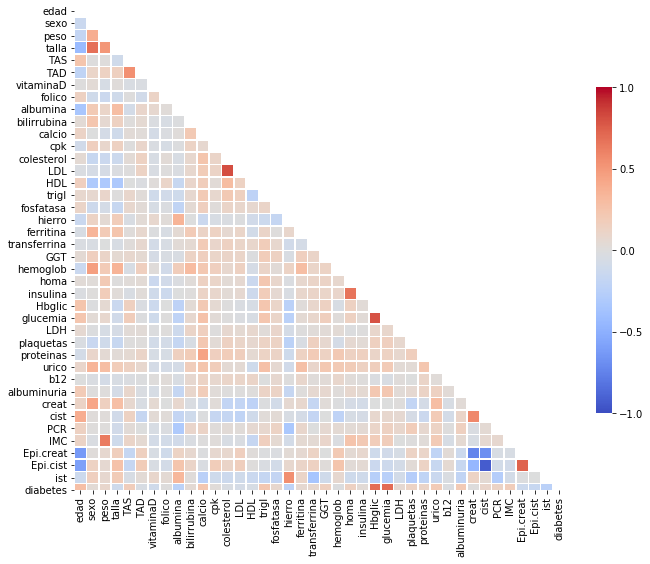

In [78]:
caracteristicas=X_train_clean
corr_matrix = caracteristicas.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

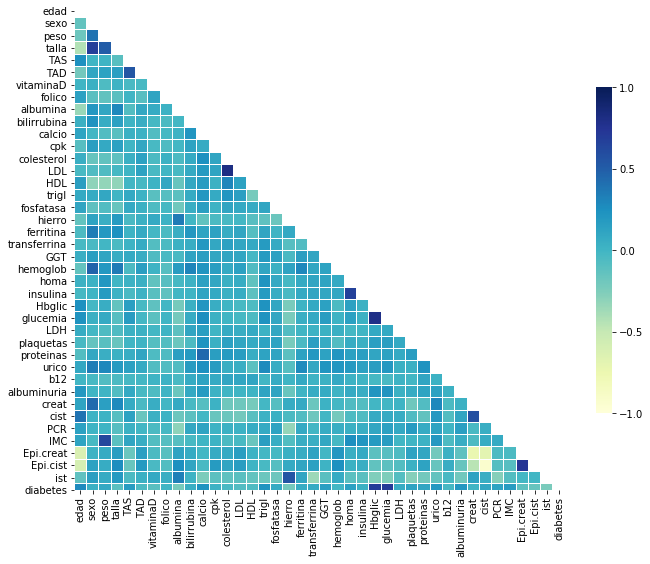

In [79]:
caracteristicas=X_train_clean

f, ax = plt.subplots(figsize=(11,15))
corr = caracteristicas.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, annot=False,mask = mask, cmap="YlGnBu",
                      square = True,
                     linewidths = .005,
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, 
                      vmax = 1, annot_kws = {'size': 12})

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns,)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
#PiYG

#### 7.2 Boxplots

In [80]:
X_train_clean["enfermedad"]=y_train

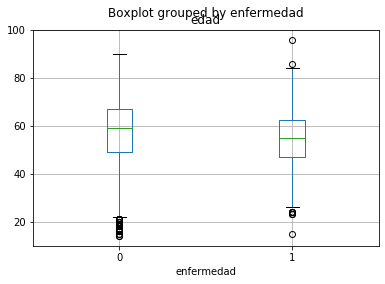

<Figure size 432x288 with 0 Axes>

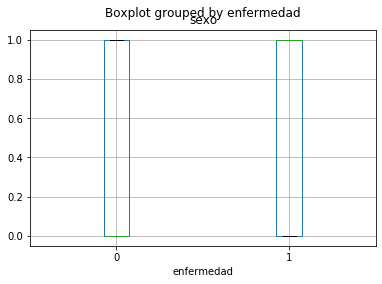

<Figure size 432x288 with 0 Axes>

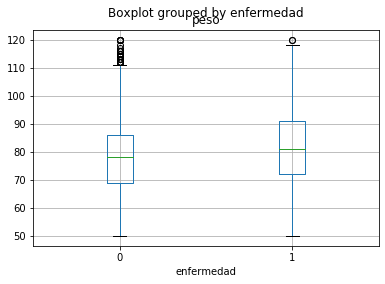

<Figure size 432x288 with 0 Axes>

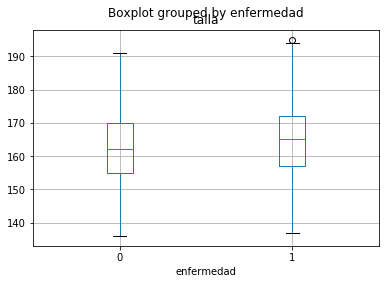

<Figure size 432x288 with 0 Axes>

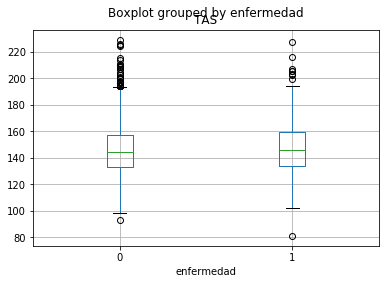

<Figure size 432x288 with 0 Axes>

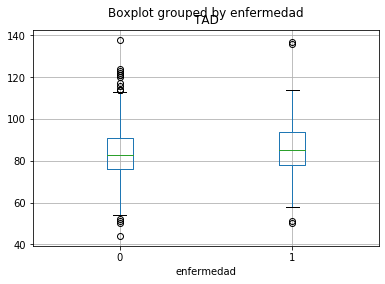

<Figure size 432x288 with 0 Axes>

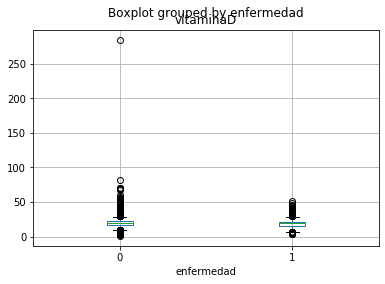

<Figure size 432x288 with 0 Axes>

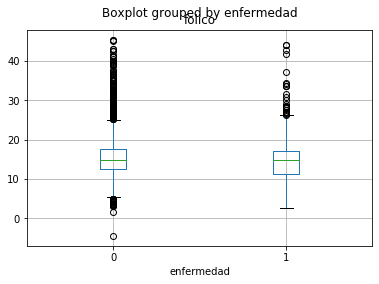

<Figure size 432x288 with 0 Axes>

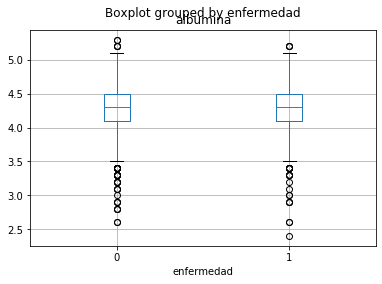

<Figure size 432x288 with 0 Axes>

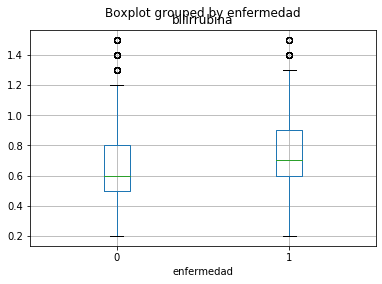

<Figure size 432x288 with 0 Axes>

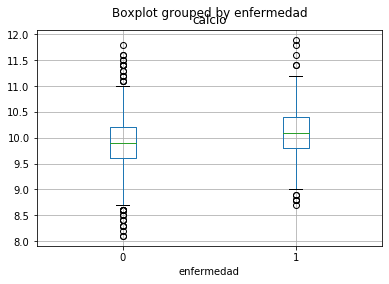

<Figure size 432x288 with 0 Axes>

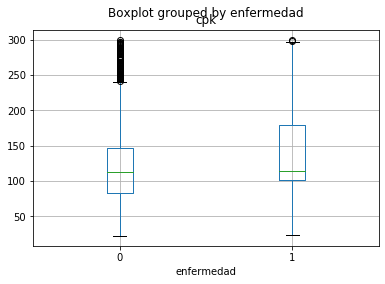

<Figure size 432x288 with 0 Axes>

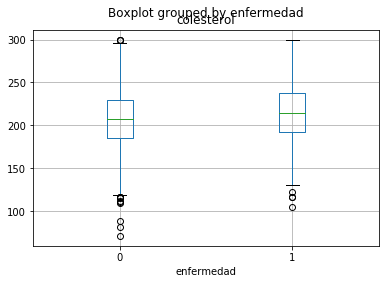

<Figure size 432x288 with 0 Axes>

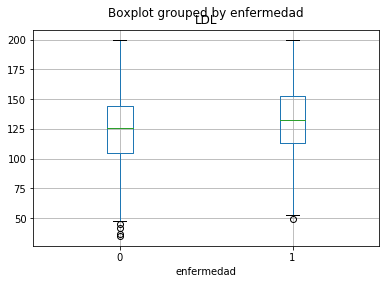

<Figure size 432x288 with 0 Axes>

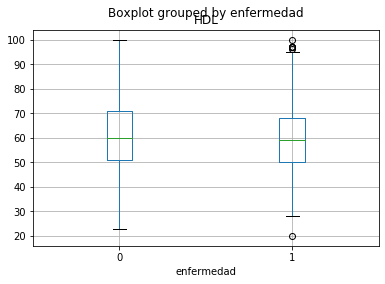

<Figure size 432x288 with 0 Axes>

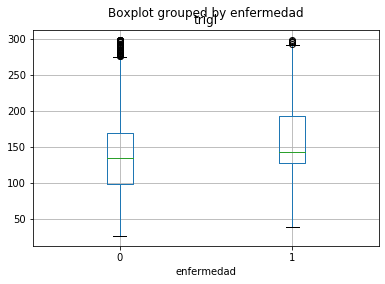

<Figure size 432x288 with 0 Axes>

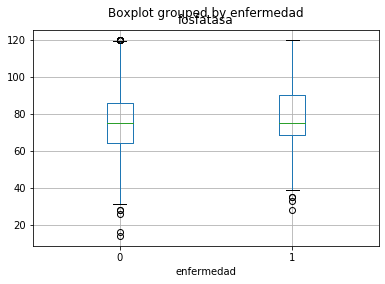

<Figure size 432x288 with 0 Axes>

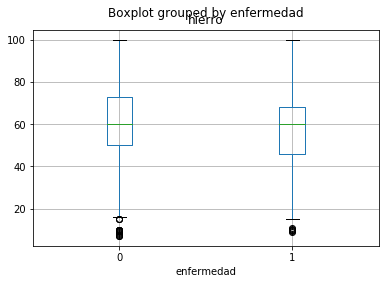

<Figure size 432x288 with 0 Axes>

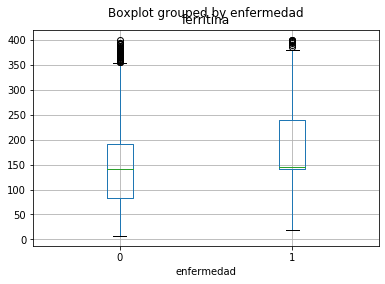

<Figure size 432x288 with 0 Axes>

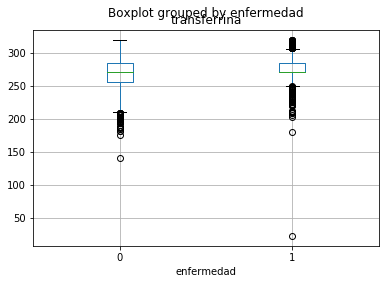

<Figure size 432x288 with 0 Axes>

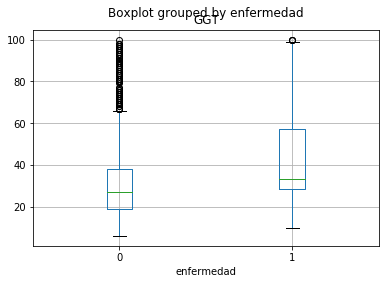

<Figure size 432x288 with 0 Axes>

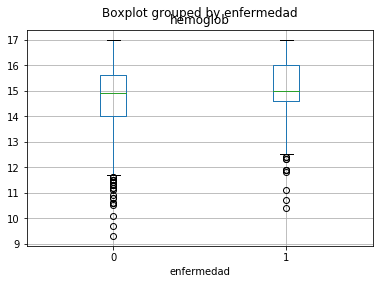

<Figure size 432x288 with 0 Axes>

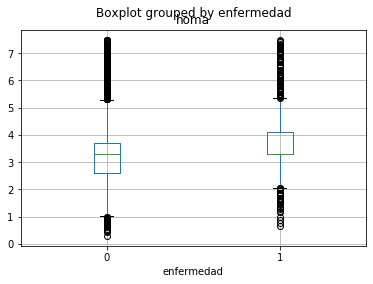

<Figure size 432x288 with 0 Axes>

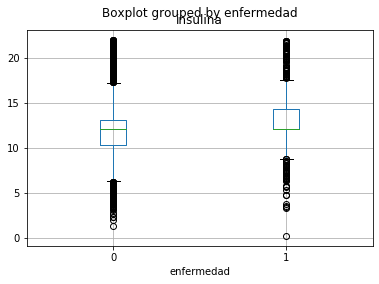

<Figure size 432x288 with 0 Axes>

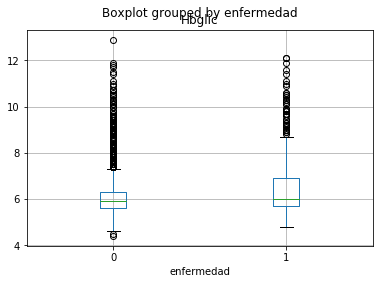

<Figure size 432x288 with 0 Axes>

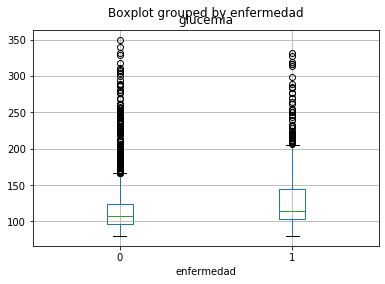

<Figure size 432x288 with 0 Axes>

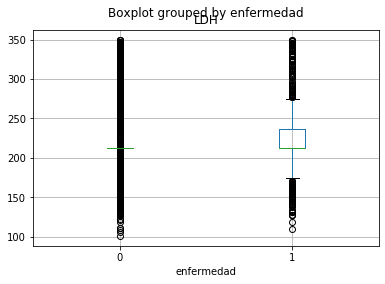

<Figure size 432x288 with 0 Axes>

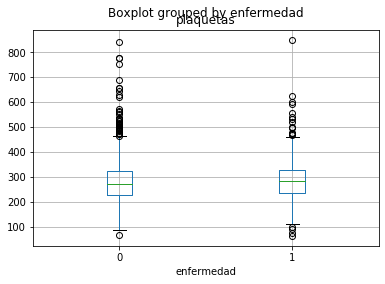

<Figure size 432x288 with 0 Axes>

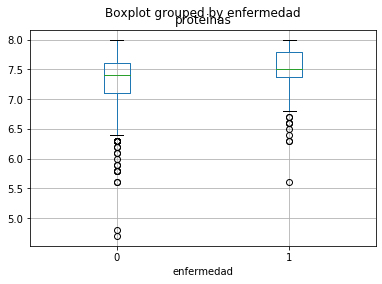

<Figure size 432x288 with 0 Axes>

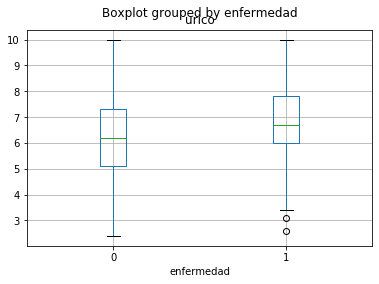

<Figure size 432x288 with 0 Axes>

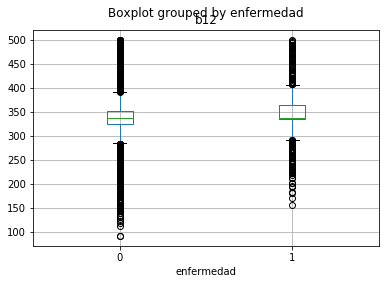

<Figure size 432x288 with 0 Axes>

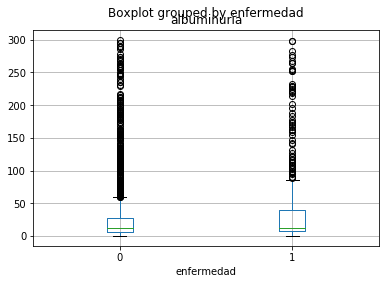

<Figure size 432x288 with 0 Axes>

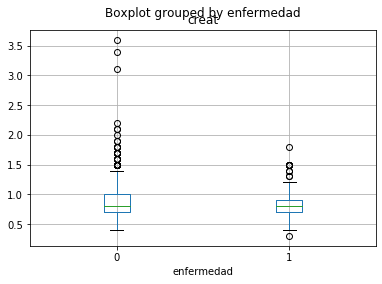

<Figure size 432x288 with 0 Axes>

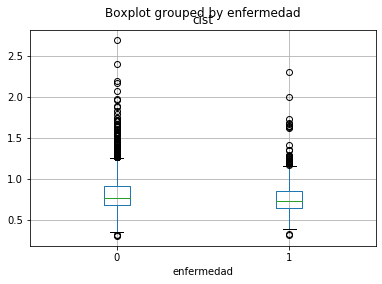

<Figure size 432x288 with 0 Axes>

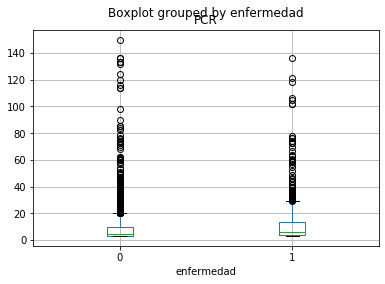

<Figure size 432x288 with 0 Axes>

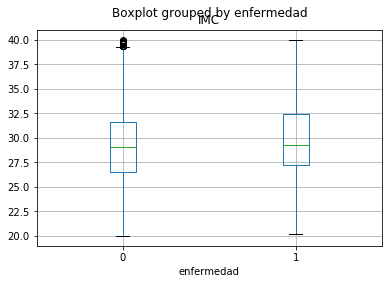

<Figure size 432x288 with 0 Axes>

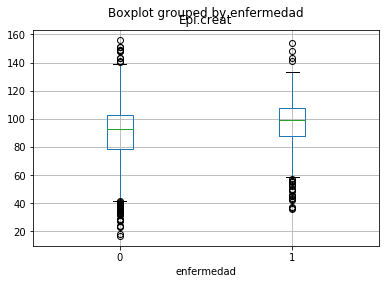

<Figure size 432x288 with 0 Axes>

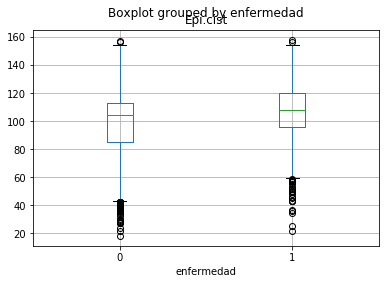

<Figure size 432x288 with 0 Axes>

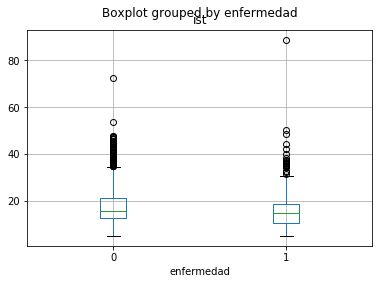

<Figure size 432x288 with 0 Axes>

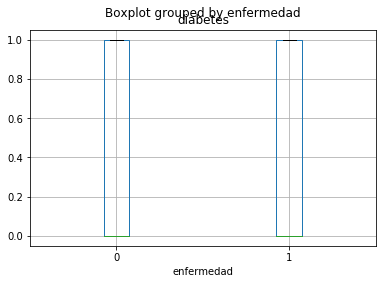

<Figure size 432x288 with 0 Axes>

In [81]:
plt.rcParams.update({'figure.max_open_warning': 0})
variables=X_train_clean.drop(['enfermedad'], axis=1)
column_name=list(variables.columns)
for i in column_name:
    X_train_clean.boxplot(by='enfermedad',column =i)
    plt.figure()



In [82]:
X_train_transformed["enfermedad"]=y_train

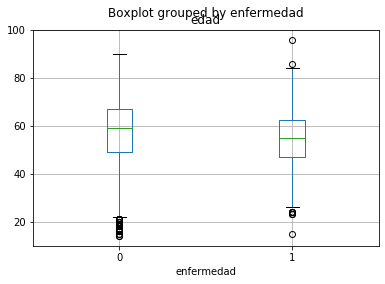

<Figure size 432x288 with 0 Axes>

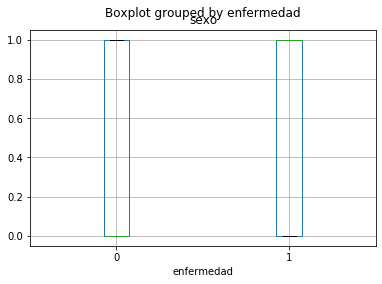

<Figure size 432x288 with 0 Axes>

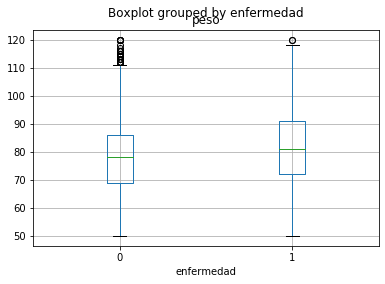

<Figure size 432x288 with 0 Axes>

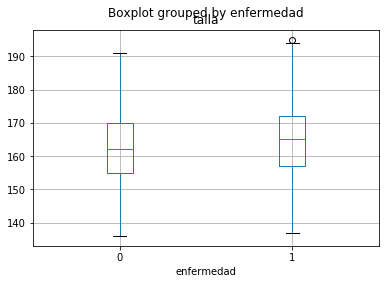

<Figure size 432x288 with 0 Axes>

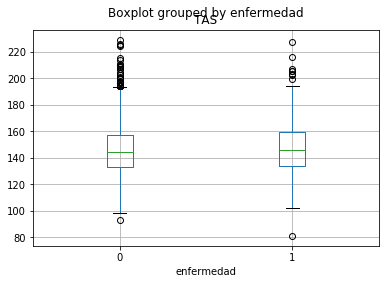

<Figure size 432x288 with 0 Axes>

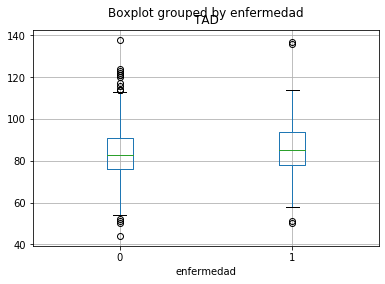

<Figure size 432x288 with 0 Axes>

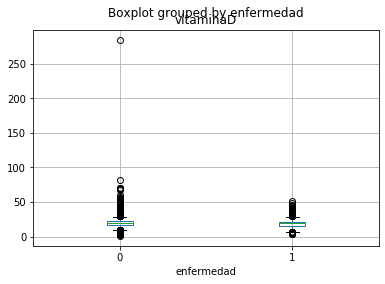

<Figure size 432x288 with 0 Axes>

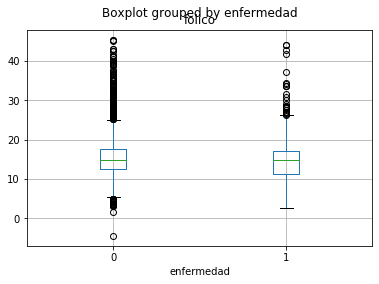

<Figure size 432x288 with 0 Axes>

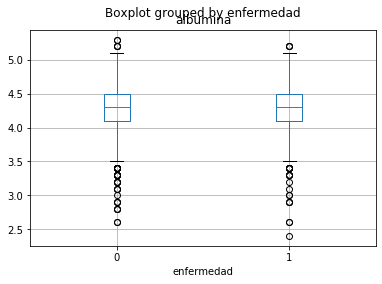

<Figure size 432x288 with 0 Axes>

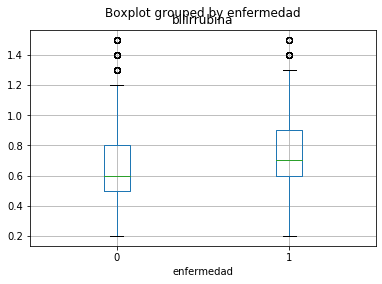

<Figure size 432x288 with 0 Axes>

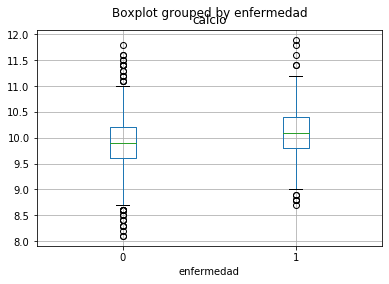

<Figure size 432x288 with 0 Axes>

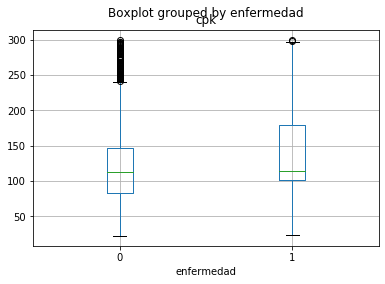

<Figure size 432x288 with 0 Axes>

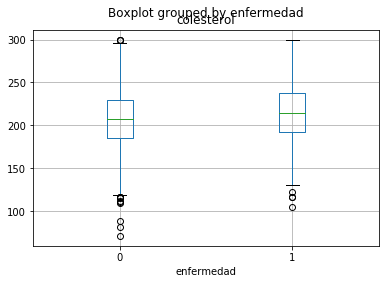

<Figure size 432x288 with 0 Axes>

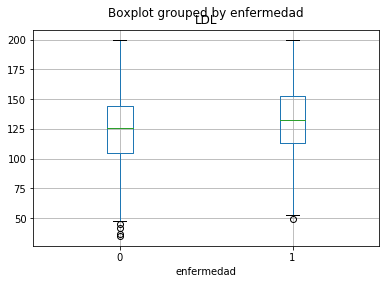

<Figure size 432x288 with 0 Axes>

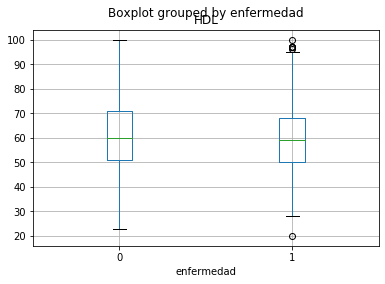

<Figure size 432x288 with 0 Axes>

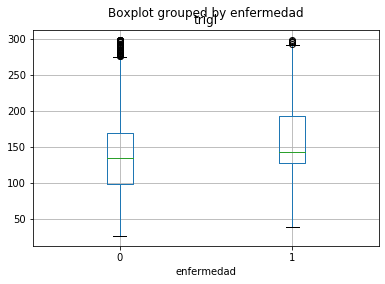

<Figure size 432x288 with 0 Axes>

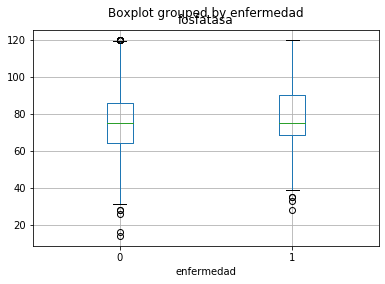

<Figure size 432x288 with 0 Axes>

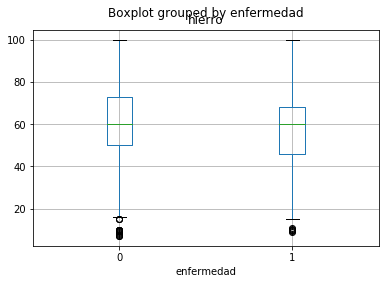

<Figure size 432x288 with 0 Axes>

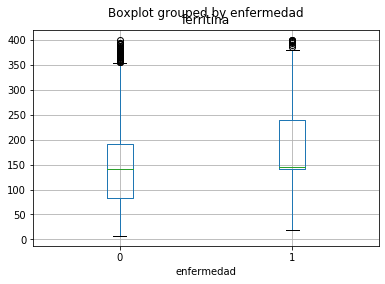

<Figure size 432x288 with 0 Axes>

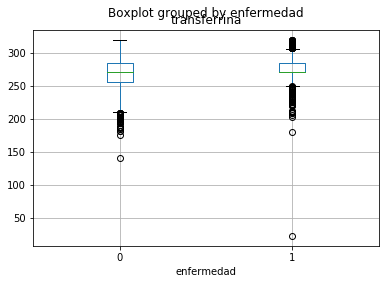

<Figure size 432x288 with 0 Axes>

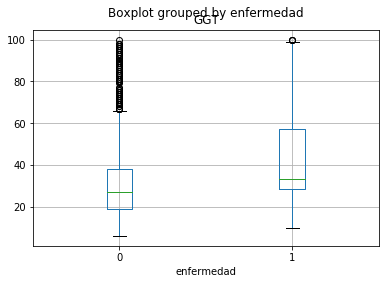

<Figure size 432x288 with 0 Axes>

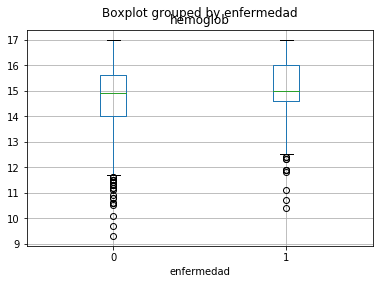

<Figure size 432x288 with 0 Axes>

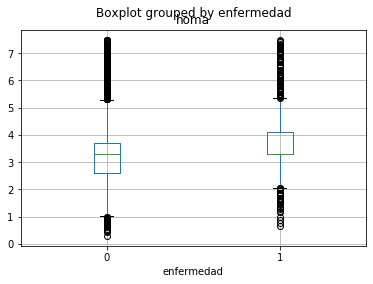

<Figure size 432x288 with 0 Axes>

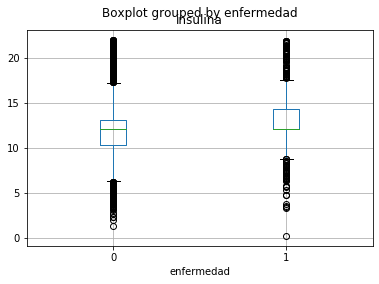

<Figure size 432x288 with 0 Axes>

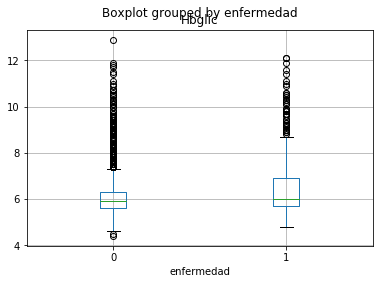

<Figure size 432x288 with 0 Axes>

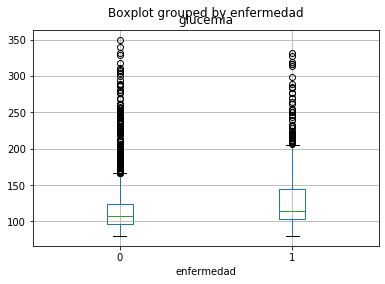

<Figure size 432x288 with 0 Axes>

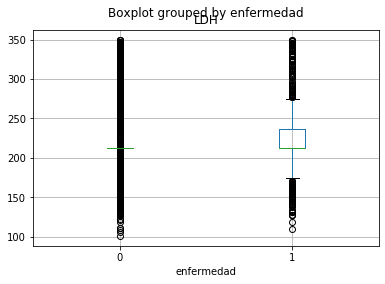

<Figure size 432x288 with 0 Axes>

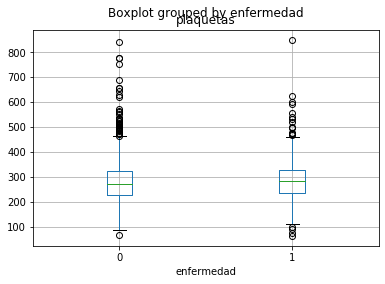

<Figure size 432x288 with 0 Axes>

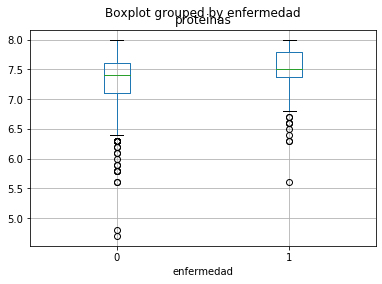

<Figure size 432x288 with 0 Axes>

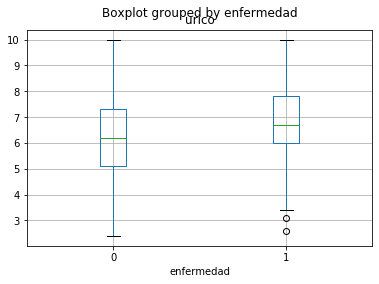

<Figure size 432x288 with 0 Axes>

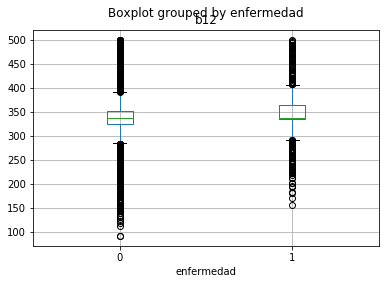

<Figure size 432x288 with 0 Axes>

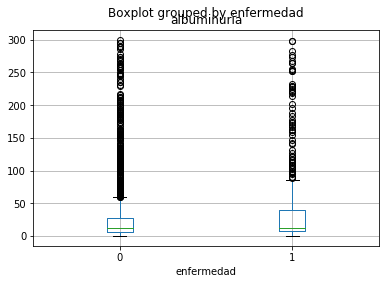

<Figure size 432x288 with 0 Axes>

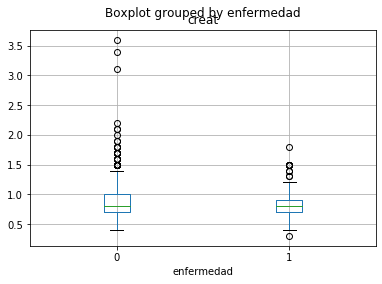

<Figure size 432x288 with 0 Axes>

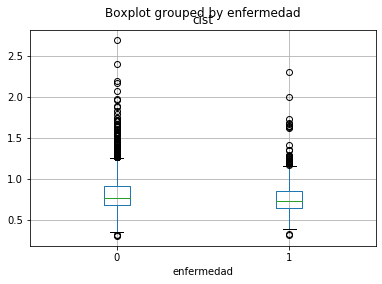

<Figure size 432x288 with 0 Axes>

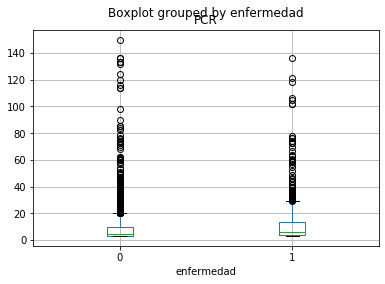

<Figure size 432x288 with 0 Axes>

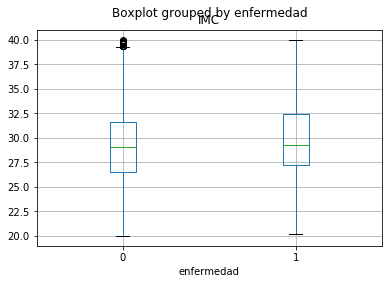

<Figure size 432x288 with 0 Axes>

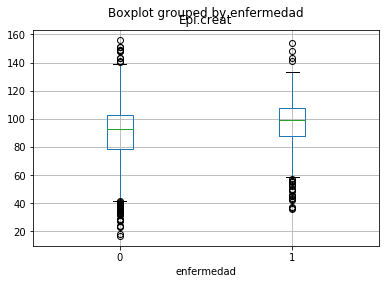

<Figure size 432x288 with 0 Axes>

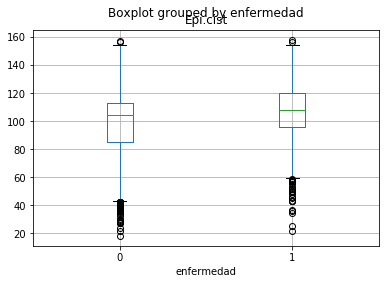

<Figure size 432x288 with 0 Axes>

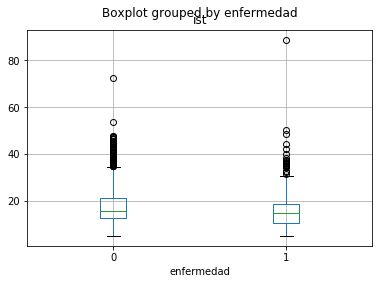

<Figure size 432x288 with 0 Axes>

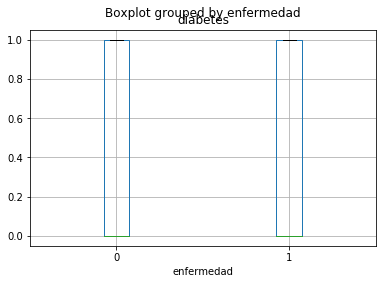

<Figure size 432x288 with 0 Axes>

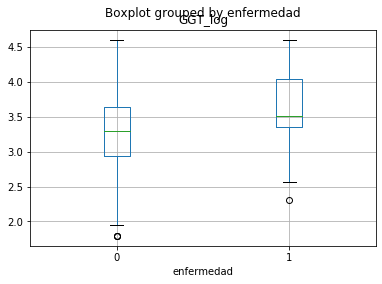

<Figure size 432x288 with 0 Axes>

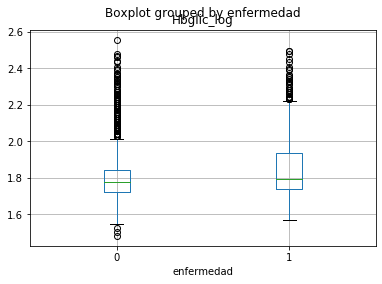

<Figure size 432x288 with 0 Axes>

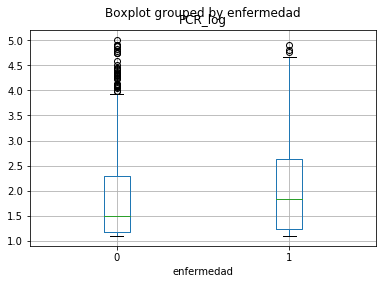

<Figure size 432x288 with 0 Axes>

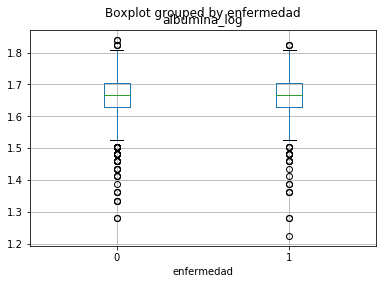

<Figure size 432x288 with 0 Axes>

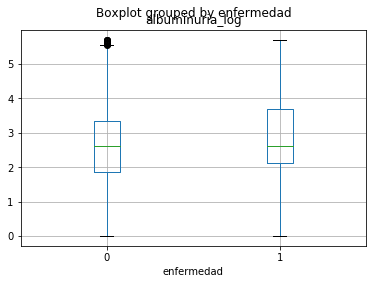

<Figure size 432x288 with 0 Axes>

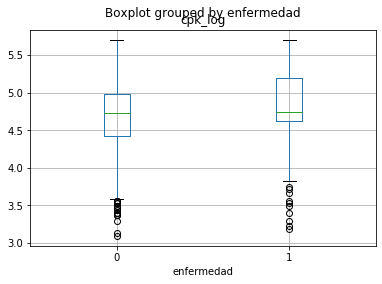

<Figure size 432x288 with 0 Axes>

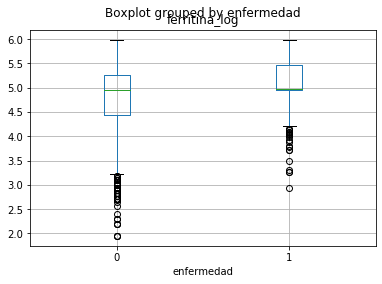

<Figure size 432x288 with 0 Axes>

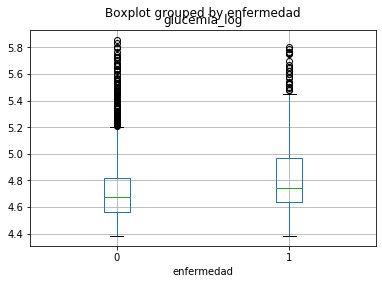

<Figure size 432x288 with 0 Axes>

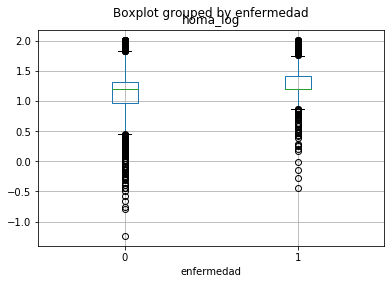

<Figure size 432x288 with 0 Axes>

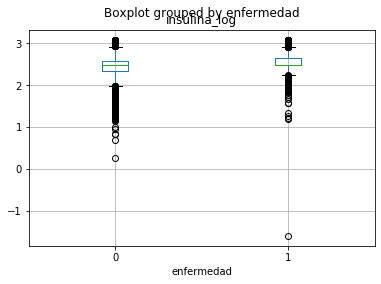

<Figure size 432x288 with 0 Axes>

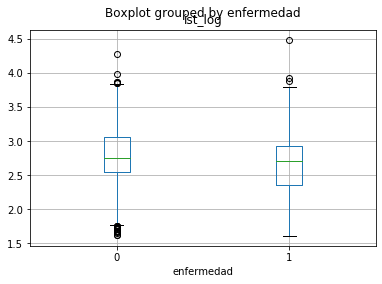

<Figure size 432x288 with 0 Axes>

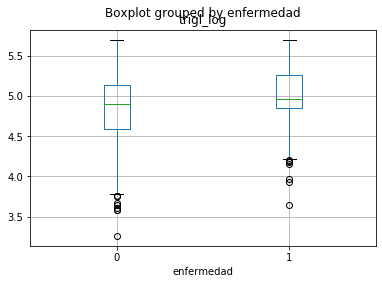

<Figure size 432x288 with 0 Axes>

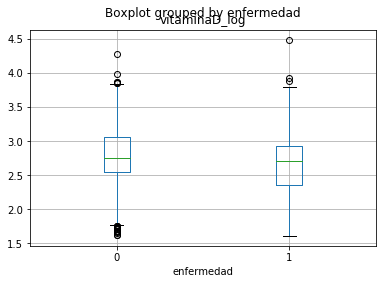

<Figure size 432x288 with 0 Axes>

In [83]:
plt.rcParams.update({'figure.max_open_warning': 0})
caracteristicas_trans=X_train_transformed.drop(['enfermedad'], axis=1)
column_name_transformed=list(caracteristicas_trans.columns)
for i in column_name_transformed:
    X_train_transformed.boxplot(by='enfermedad',column =i)
    plt.figure()

Aquellas que podrían tener una mayor significancia en la enfermedad son **peso, bilirrubina, cpk, trigl, ferritina, GGT,  LDH.**

Text(0.5, 1.0, 'cpk')

<Figure size 432x288 with 0 Axes>

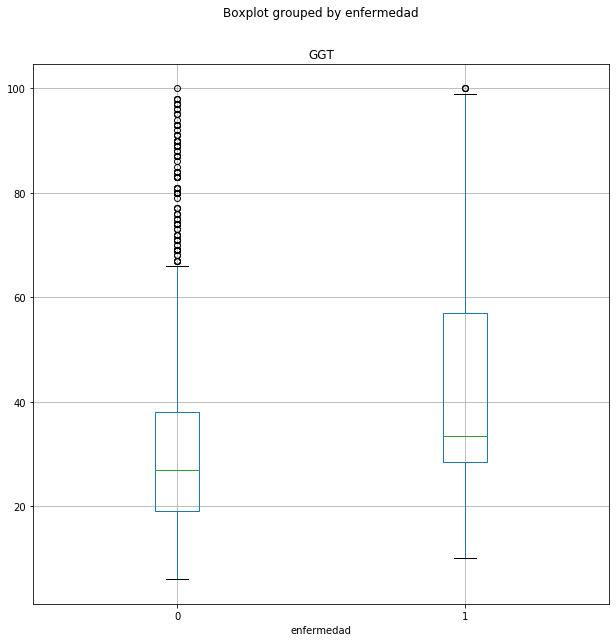

<Figure size 432x288 with 0 Axes>

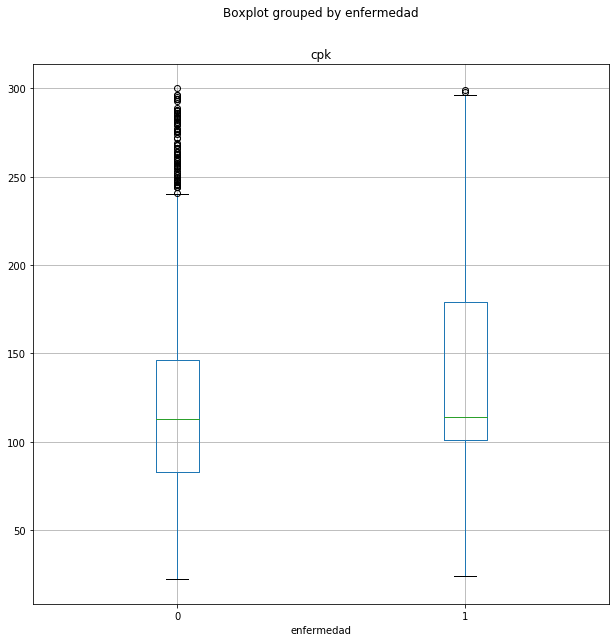

In [84]:
plt.figure()
X_train_clean.boxplot(by='enfermedad',column="GGT",figsize=(10,10))
plt.title("GGT")

plt.figure()
X_train_clean.boxplot(by='enfermedad',column="cpk",figsize=(10,10))
plt.title("cpk")

Text(0.5, 1.0, 'bilirrubina')

<Figure size 432x288 with 0 Axes>

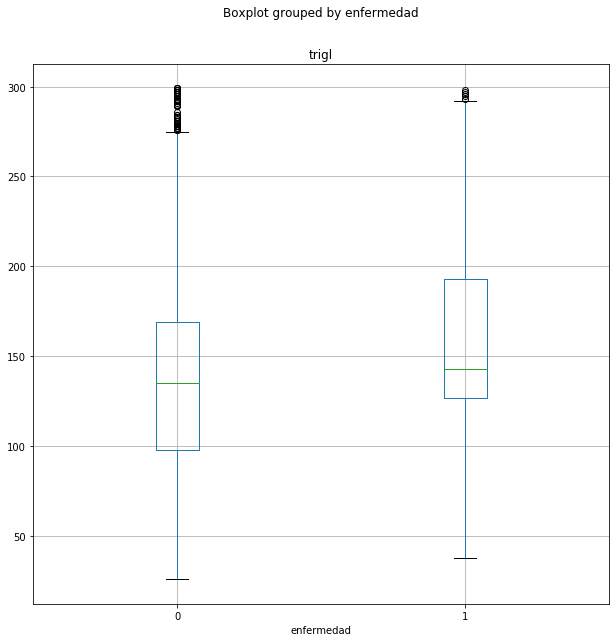

<Figure size 432x288 with 0 Axes>

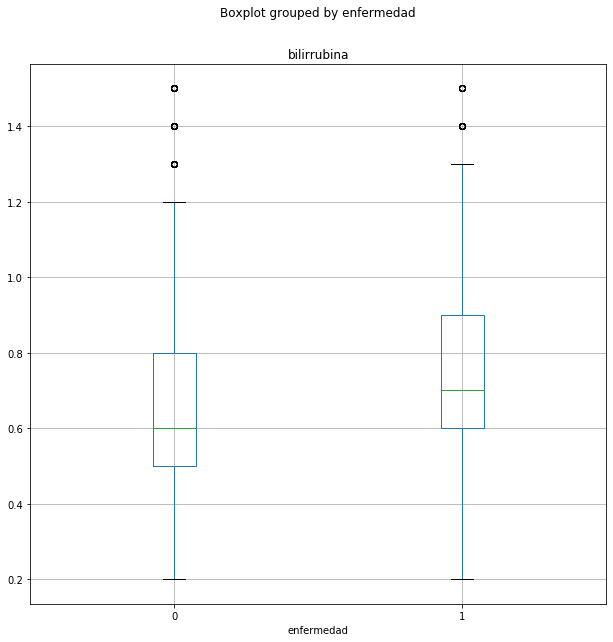

In [85]:
plt.figure()
X_train_clean.boxplot(by='enfermedad',column="trigl",figsize=(10,10))
plt.title("trigl")

plt.figure()
X_train_clean.boxplot(by='enfermedad',column="bilirrubina",figsize=(10,10))
plt.title("bilirrubina")

Text(0.5, 1.0, 'ferritina')

<Figure size 432x288 with 0 Axes>

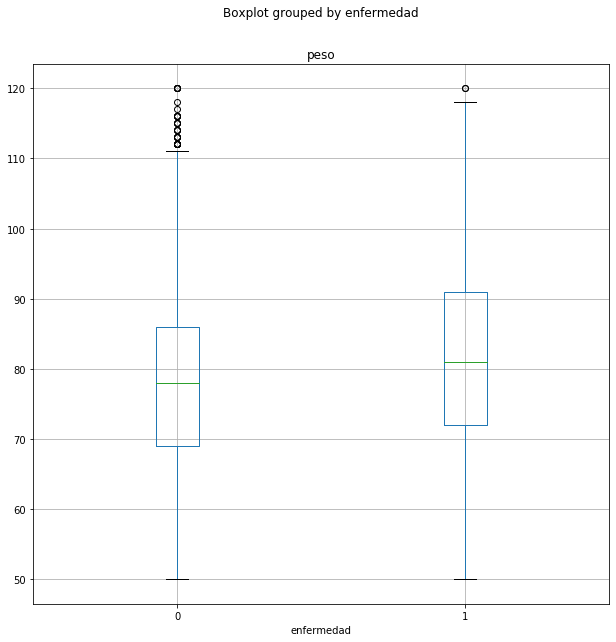

<Figure size 432x288 with 0 Axes>

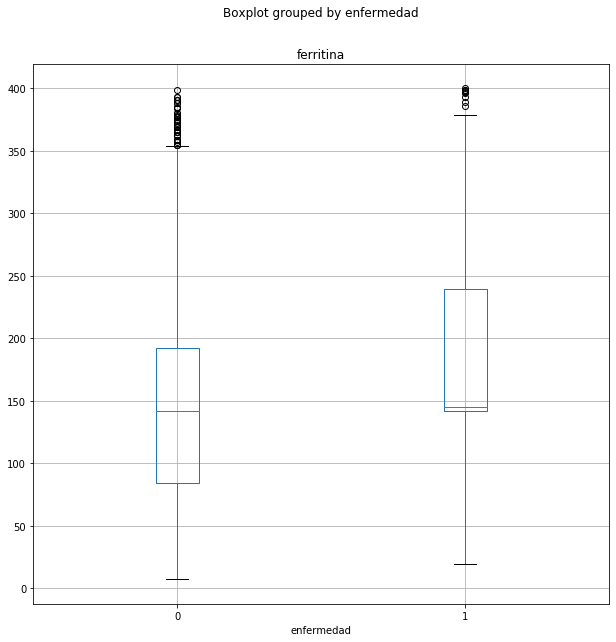

In [86]:
plt.figure()
X_train_clean.boxplot(by='enfermedad',column="peso",figsize=(10,10))
plt.title("peso")

plt.figure()
X_train_clean.boxplot(by='enfermedad',column="ferritina",figsize=(10,10))
plt.title("ferritina")

**Otra representación de bloxplots**

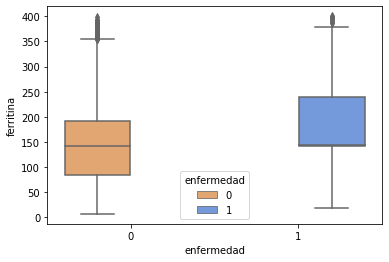

In [111]:
my_pal = {0: "sandybrown", 1: "cornflowerblue"}


    

sns.boxplot(y='ferritina', x='enfermedad', 
                 data=X_train_clean, 
                 palette=my_pal,
                 hue='enfermedad' )
#colorblind
plt.savefig("ferritina_1.png",bbox_inches='tight', dpi=300)

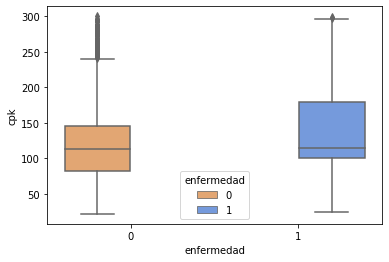

In [112]:
sns.boxplot(y='cpk', x='enfermedad', 
                 data=X_train_clean, 
                 palette=my_pal,
                 hue='enfermedad')
plt.savefig("cpk_1.png",bbox_inches='tight', dpi=300)
#colorblind

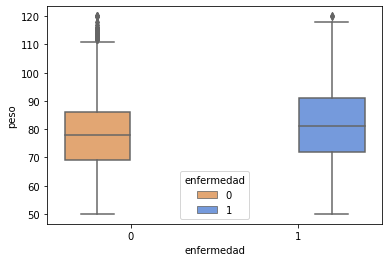

In [113]:
sns.boxplot(y='peso', x='enfermedad', 
                 data=X_train_clean, 
                 palette=my_pal, hue='enfermedad')
plt.savefig("peso_1.png",bbox_inches='tight', dpi=300)

#colorblind

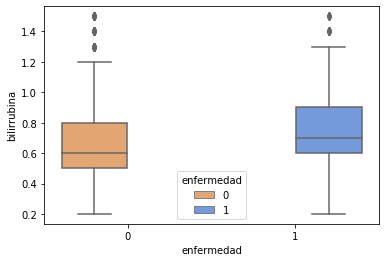

In [114]:
sns.boxplot(y='bilirrubina', x='enfermedad', 
                 data=X_train_clean, 
                 palette=my_pal,
                 hue='enfermedad')
plt.savefig("bilirrubina_1.png",bbox_inches='tight', dpi=300)
#colorblind

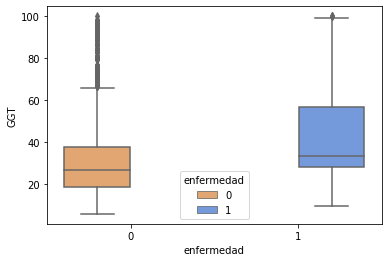

In [115]:
sns.boxplot(y='GGT', x='enfermedad', 
                 data=X_train_clean, 
                 palette=my_pal,
                 hue='enfermedad')
plt.savefig("ggt_1.png",bbox_inches='tight', dpi=300)
#colorblind

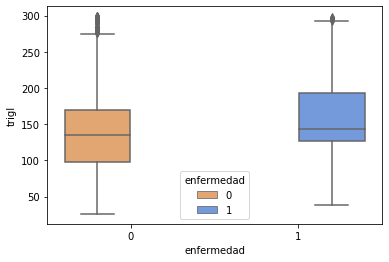

In [116]:
sns.boxplot(y='trigl', x='enfermedad', 
                 data=X_train_clean, 
                 palette=my_pal,
                 hue='enfermedad')
plt.savefig("trigl_1.png",bbox_inches='tight', dpi=300)
#colorblind Set1, Set2

### 8. Extracción dataframe final

In [61]:
X_test_clean

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,glucemia,LDH,plaquetas,proteinas,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,enfermedad
2385,40.0,1,82.0,175.0,151.0,92,33.0,13.500,5.0,0.4,9.7,189.0,219.0,163.0,40.0,81.0,75.0,88.0,168.0,286.0,28.5,15.9,1.80,8.6,5.6,85.0,212.0,229.0,7.6,6.7,408.00,5.51,1.3,0.77,3.02,26.8,68.251269,115.480381,21.8,0,0
1005,72.0,0,82.0,151.0,117.0,77,33.0,6.500,4.0,1.0,9.7,113.0,179.0,105.0,62.0,108.0,76.0,76.0,294.0,271.0,44.0,15.2,3.30,12.1,5.9,98.0,212.0,247.0,6.9,7.9,336.35,12.96,0.7,0.92,5.62,36.0,86.559110,77.149513,15.8,0,0
2506,34.0,1,77.0,178.0,122.0,66,19.0,14.805,4.3,0.6,9.3,113.0,215.0,130.0,42.0,213.0,75.0,60.0,394.0,235.0,29.0,14.5,3.30,12.1,5.9,84.0,212.0,287.0,7.4,4.9,336.35,12.53,0.9,0.76,3.30,24.3,111.043607,104.235412,47.1,0,0
73,51.0,1,106.0,177.0,122.0,90,19.0,7.100,4.3,0.9,10.2,194.0,268.0,148.0,71.0,226.0,75.0,85.0,142.0,286.0,28.5,17.0,4.37,16.8,6.0,118.0,300.0,402.0,7.4,8.1,299.00,13.23,0.7,0.75,13.30,33.8,109.267036,111.960346,21.1,0,1
1045,59.0,1,117.0,167.0,163.0,89,17.0,18.000,4.6,0.4,9.5,127.0,187.0,110.0,55.0,108.0,60.0,87.0,167.0,228.0,40.0,12.5,3.30,12.1,6.4,110.0,212.0,309.0,7.6,6.6,372.00,36.00,1.0,0.95,16.00,29.1,82.017017,83.567837,27.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,46.0,0,69.0,168.0,129.0,83,15.0,13.500,4.7,0.3,10.0,100.0,242.0,165.0,55.0,111.0,75.0,64.0,55.0,271.0,21.0,13.9,5.31,21.5,5.9,100.0,212.0,264.0,7.9,4.9,310.00,10.00,0.8,0.62,3.17,24.4,88.413800,117.067292,13.5,0,0
1978,52.0,0,78.0,166.0,131.0,80,19.0,14.805,4.0,0.2,9.3,105.0,204.0,150.0,53.0,155.0,111.0,49.0,55.0,238.0,22.0,13.3,3.19,13.9,5.9,96.0,212.0,398.0,7.3,6.5,336.35,88.30,0.9,0.76,9.59,29.1,73.514355,104.235412,14.6,0,0
964,84.0,1,71.0,153.0,145.0,78,13.0,11.800,3.0,0.6,9.3,157.0,196.0,128.0,64.0,80.0,69.0,28.0,104.0,266.0,42.0,14.1,3.43,12.3,5.8,120.0,296.0,177.0,6.6,6.9,336.35,31.40,0.7,0.72,19.00,30.3,86.659138,100.108063,7.5,0,0
1875,86.0,0,54.0,131.0,135.0,70,27.0,33.200,4.9,0.7,10.1,83.0,213.0,120.0,73.0,102.0,71.0,74.0,201.0,306.0,25.0,16.3,3.24,11.5,6.3,114.0,212.0,298.0,7.5,5.7,336.35,12.53,0.6,0.85,3.34,31.5,82.533023,81.022535,17.2,0,0


In [62]:
X_test_transformed

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,...,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,GGT_log,Hbglic_log,PCR_log,albumina_log,albuminuria_log,cpk_log,ferritina_log,glucemia_log,homa_log,insulina_log,ist_log,trigl_log,vitaminaD_log,enfermedad
2385,40.0,1,82.0,175.0,151.0,92,33.0,13.500,5.0,0.4,9.7,189.0,219.0,163.0,40.0,81.0,75.0,88.0,168.0,286.0,28.5,15.9,1.80,8.6,5.6,...,6.7,408.00,5.51,1.3,0.77,3.02,26.8,68.251269,115.480381,21.8,0,3.349904,1.722767,1.105257,1.791759,1.873339,5.241747,5.123964,4.442651,0.587787,2.151762,3.081910,4.394449,3.081910,0
1005,72.0,0,82.0,151.0,117.0,77,33.0,6.500,4.0,1.0,9.7,113.0,179.0,105.0,62.0,108.0,76.0,76.0,294.0,271.0,44.0,15.2,3.30,12.1,5.9,...,7.9,336.35,12.96,0.7,0.92,5.62,36.0,86.559110,77.149513,15.8,0,3.784190,1.774952,1.726332,1.609438,2.636196,4.727388,5.683580,4.584967,1.193922,2.493205,2.760010,4.682131,2.760010,0
2506,34.0,1,77.0,178.0,122.0,66,19.0,14.805,4.3,0.6,9.3,113.0,215.0,130.0,42.0,213.0,75.0,60.0,394.0,235.0,29.0,14.5,3.30,12.1,5.9,...,4.9,336.35,12.53,0.9,0.76,3.30,24.3,111.043607,104.235412,47.1,0,3.367296,1.774952,1.193922,1.667707,2.604909,4.727388,5.976351,4.430817,1.193922,2.493205,3.852273,5.361292,3.852273,0
73,51.0,1,106.0,177.0,122.0,90,19.0,7.100,4.3,0.9,10.2,194.0,268.0,148.0,71.0,226.0,75.0,85.0,142.0,286.0,28.5,17.0,4.37,16.8,6.0,...,8.1,299.00,13.23,0.7,0.75,13.30,33.8,109.267036,111.960346,21.1,0,3.349904,1.791759,2.587764,1.667707,2.655352,5.267858,4.955827,4.770685,1.474763,2.821379,3.049273,5.420535,3.049273,1
1045,59.0,1,117.0,167.0,163.0,89,17.0,18.000,4.6,0.4,9.5,127.0,187.0,110.0,55.0,108.0,60.0,87.0,167.0,228.0,40.0,12.5,3.30,12.1,6.4,...,6.6,372.00,36.00,1.0,0.95,16.00,29.1,82.017017,83.567837,27.1,0,3.688879,1.856298,2.772589,1.722767,3.610918,4.844187,5.117994,4.700480,1.193922,2.493205,3.299534,4.682131,3.299534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,46.0,0,69.0,168.0,129.0,83,15.0,13.500,4.7,0.3,10.0,100.0,242.0,165.0,55.0,111.0,75.0,64.0,55.0,271.0,21.0,13.9,5.31,21.5,5.9,...,4.9,310.00,10.00,0.8,0.62,3.17,24.4,88.413800,117.067292,13.5,0,3.044522,1.774952,1.153732,1.740466,2.397895,4.605170,4.007333,4.605170,1.669592,3.068053,2.602690,4.709530,2.602690,0
1978,52.0,0,78.0,166.0,131.0,80,19.0,14.805,4.0,0.2,9.3,105.0,204.0,150.0,53.0,155.0,111.0,49.0,55.0,238.0,22.0,13.3,3.19,13.9,5.9,...,6.5,336.35,88.30,0.9,0.76,9.59,29.1,73.514355,104.235412,14.6,0,3.091042,1.774952,2.260721,1.609438,4.492001,4.653960,4.007333,4.564348,1.160021,2.631889,2.681022,5.043425,2.681022,0
964,84.0,1,71.0,153.0,145.0,78,13.0,11.800,3.0,0.6,9.3,157.0,196.0,128.0,64.0,80.0,69.0,28.0,104.0,266.0,42.0,14.1,3.43,12.3,5.8,...,6.9,336.35,31.40,0.7,0.72,19.00,30.3,86.659138,100.108063,7.5,0,3.737670,1.757858,2.944439,1.386294,3.478158,5.056246,4.644391,4.787492,1.232560,2.509599,2.014903,4.382027,2.014903,0
1875,86.0,0,54.0,131.0,135.0,70,27.0,33.200,4.9,0.7,10.1,83.0,213.0,120.0,73.0,102.0,71.0,74.0,201.0,306.0,25.0,16.3,3.24,11.5,6.3,...,5.7,336.35,12.53,0.6,0.85,3.34,31.5,82.533023,81.022535,17.2,0,3.218876,1.840550,1.205971,1.774952,2.604909,4.418841,5.303305,4.736198,1.175573,2.442347,2.844909,4.624973,2.844909,0


In [59]:
X_test_clean["enfermedad"]=y_test
X_test_transformed["enfermedad"]=y_test

In [65]:
X_train_transformed

,edad,sexo,peso,talla,TAS,TAD,vitaminaD,folico,albumina,bilirrubina,calcio,cpk,colesterol,LDL,HDL,trigl,fosfatasa,hierro,ferritina,transferrina,GGT,hemoglob,homa,insulina,Hbglic,...,urico,b12,albuminuria,creat,cist,PCR,IMC,Epi.creat,Epi.cist,ist,diabetes,GGT_log,Hbglic_log,PCR_log,albumina_log,albuminuria_log,cpk_log,ferritina_log,glucemia_log,homa_log,insulina_log,ist_log,trigl_log,vitaminaD_log,enfermedad
1469,50.0,1,81.0,164.0,133.0,85,19.0,14.805,5.0,0.5,9.8,128.0,180.0,91.0,69.0,102.0,94.0,70.0,290.0,242.0,19.0,16.3,5.58,19.0,5.9,...,5.1,336.35,0.043,0.8,0.63,3.00,30.1,104.161020,122.627968,20.5,0,2.944439,1.774952,1.098612,1.791759,0.042101,4.852030,5.669881,4.779123,1.719189,2.944439,3.020425,4.624973,3.020425,0
2274,63.0,0,60.0,154.0,145.0,77,25.0,27.500,4.7,0.7,9.9,77.0,254.0,153.0,89.0,71.0,98.0,74.0,132.0,289.0,14.0,12.1,3.06,11.8,5.5,...,4.3,438.00,7.230,0.7,0.73,5.73,25.3,92.208200,100.797479,18.2,0,2.639057,1.704748,1.745716,1.740466,2.107786,4.343805,4.882802,4.663439,1.118415,2.468100,2.901422,4.262680,2.901422,0
423,57.0,1,83.0,169.0,142.0,96,16.0,11.700,4.0,0.9,9.8,113.0,173.0,88.0,85.0,184.0,80.0,67.0,217.0,318.0,28.5,14.9,3.63,9.3,9.0,...,6.8,244.00,126.570,1.0,1.04,3.44,29.1,83.177425,74.699408,15.0,1,3.349904,2.197225,1.235471,1.609438,4.848665,4.727388,5.379897,5.252273,1.289233,2.230014,2.708050,5.214936,2.708050,1
1529,33.0,0,110.0,166.0,117.0,63,8.0,4.400,4.0,0.3,8.7,61.0,219.0,126.0,44.0,135.0,48.0,75.0,73.0,259.0,21.0,11.4,5.53,12.1,5.7,...,5.0,122.00,12.530,0.6,0.53,8.80,39.9,119.761599,133.368715,20.6,0,3.044522,1.740466,2.174752,1.609438,2.604909,4.110874,4.290459,4.499810,1.710188,2.493205,3.025291,4.905275,3.025291,0
934,68.0,0,75.0,154.0,141.0,82,16.0,11.500,4.5,0.7,10.7,200.0,248.0,147.0,72.0,156.0,102.0,85.0,137.0,271.0,64.0,15.1,4.52,16.8,6.0,...,5.7,320.00,0.000,0.7,0.92,3.44,31.6,89.025780,78.396348,17.8,0,4.158883,1.791759,1.235471,1.704748,0.000000,5.298317,4.919981,4.700480,1.508512,2.821379,2.879198,5.049856,2.879198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,51.0,1,83.0,174.0,132.0,86,19.0,14.805,4.7,0.8,10.1,127.0,270.0,187.0,58.0,137.0,67.0,91.0,110.0,270.0,28.5,14.9,1.54,6.5,5.9,...,5.6,336.35,0.000,1.0,0.76,3.30,27.4,86.758089,104.235412,23.9,0,3.349904,1.774952,1.193922,1.740466,0.000000,4.844187,4.700480,4.653960,0.431782,1.871802,3.173878,4.919981,3.173878,1
721,49.0,0,70.0,169.0,100.0,72,16.0,11.100,4.1,0.8,10.5,121.0,264.0,174.0,97.0,117.0,79.0,59.0,141.0,252.0,12.0,15.6,2.71,11.3,6.0,...,5.8,364.80,23.490,0.9,0.75,3.45,24.5,75.080024,105.186855,16.6,0,2.484907,1.791759,1.238374,1.629241,3.198265,4.795791,4.948760,4.718499,0.996949,2.424803,2.809403,4.762174,2.809403,0
2529,59.0,1,74.0,167.0,136.0,82,19.0,12.600,4.5,0.4,10.4,86.0,203.0,118.0,62.0,195.0,71.0,94.0,63.0,271.0,71.0,14.9,6.02,12.1,5.7,...,7.5,276.60,131.240,0.9,0.80,3.22,26.5,93.158991,104.991130,19.6,0,4.262680,1.740466,1.169381,1.704748,4.884618,4.454347,4.143135,4.812184,1.795087,2.493205,2.975530,5.273000,2.975530,0
178,54.0,1,83.0,166.0,150.0,98,18.0,6.500,4.3,1.4,10.0,113.0,258.0,168.0,70.0,146.0,97.0,70.0,161.0,284.0,39.0,16.4,4.15,12.0,6.3,...,8.4,287.40,12.530,1.0,0.69,3.45,30.1,84.948893,115.321989,17.5,1,3.663562,1.840550,1.238374,1.667707,2.604909,4.727388,5.081404,4.983607,1.423108,2.484907,2.862201,4.983607,2.862201,0


In [60]:
X_train_clean.to_csv(r'C:\Users\rober\OneDrive\Escritorio\EHGNA\TFG\Train_original.csv')
X_train_transformed.to_csv(r'C:\Users\rober\OneDrive\Escritorio\EHGNA\TFG\Train_transformed.csv')
X_test_clean.to_csv(r'C:\Users\rober\OneDrive\Escritorio\EHGNA\TFG\Test_original.csv')
X_test_transformed.to_csv(r'C:\Users\rober\OneDrive\Escritorio\EHGNA\TFG\Test_transformed.csv')